#Step 1. Defining Objectives and Information Needs

It all began with a conversation. A manager from Superstore approached me with a concern:

**“We’re seeing signs that some areas of our business might be seriously underperforming – especially in places like Texas. I need you to find out where we’re actually losing money.”**

With that, the task was set.

Before diving into the data, I sat down with the manager to clarify exactly what he wanted to know. The goal wasn’t to perform a deep audit of every product or region – there wasn’t enough time for that. Instead, the objective was sharp and focused:

**“Identify the worst-performing areas of Superstore. Show me where we’re bleeding profit – the categories and regions where we should consider taking action immediately.”**

This meant looking for negative patterns across sales, profit, and discounts, drilling down into categories, sub-categories, and regions. The manager needed actionable insights, not just observations – and ideally, he wanted suggestions on what could be stopped or fixed right away.

My mission was clear:

🔍 **Scan the business, locate the pain points, and highlight the worst performers.**

This first step laid the foundation for the entire analysis. It defined not only what we were looking for, but why we were looking for it – and for whom.

#Step 2. Collecting Data

In this project, the data collection step was already largely complete. We worked with the well-known Superstore dataset, a synthetic but realistic business dataset commonly used for training and demonstration purposes in Business Intelligence and Analytics.

Although we didn’t need to gather or integrate new sources, we can imagine how such a dataset might have been constructed in a real-world scenario:

- Sales data likely came from the company's Point-of-Sale (POS) systems, automatically tracking transactions across states and product categories.

- Profit was probably calculated by subtracting item-specific costs from the revenue — these costs could include purchase prices, shipping, storage, or discounts.

- Discounts were recorded directly from order records when promotional pricing or markdowns were applied.

- Customer and shipping details might have been pulled from a CRM or logistics platform, providing valuable dimensions for regional and segment-level analysis.

In short, while our dataset was ready for analysis, it mirrors the kind of structured, transactional data a retail company might collect from multiple systems — ERP, CRM, and eCommerce platforms — and combine into a central data warehouse or analytics tool.

This enabled us to move straight into the exploration and analysis phase without worrying about cleaning or merging messy real-world sources.

#Step 3. Analysing Data

## Importing and Understanding Data

Here we are going to get a general overview of the dataset before we begin identifying the parts of the business that are underperforming.
We assume that developing a general understanding of the data will help us later when we dive deeper into the detailed exploration in the section “Data Analysis – Main Part.”

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
PATH = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252')
df = raw_df.copy()

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [ ]:
# lets see how big is the dataset
df.shape

(9994, 21)

###head() and tail()
The head() and tail() functions are commonly used in the early stages of exploratory data analysis (EDA) to quickly inspect the structure and content of a dataset.

head() displays the first few rows (by default 5), giving an overview of how the dataset begins.

tail() shows the last few rows, which can be useful to check for inconsistencies, trends, or differences at the end of the dataset.

Together, these functions help validate that the data was loaded correctly, assess the presence of expected columns and data types, and provide a quick impression of potential patterns or issues—such as missing values, incorrect data types, or unexpected duplicates.

In [ ]:
# lets see what is at the beginning
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# maby the tail looks different
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


####Insides from head() and tail()
The first and last few rows of the dataset reveal several key characteristics:

- Each row represents a single product line within an order.

- The dataset is not sorted by date, which should be addressed for any time-based analysis.

- There are both profitable and unprofitable transactions, often associated with high discounts.

- Multiple product lines can belong to the same order, as seen from repeated Order IDs.

- The data includes rich dimensions such as customer info, product categories, regions, and order details—making it suitable for segmentation and drill-down analysis.

This initial inspection confirms the dataset is well-structured for further business analysis and highlights areas to explore, such as profitability by sub-category, the impact of discounts, and regional performance.

###info() and describe()
In the early stages of analysis, info() and describe() are used to gain a quick overview of the dataset. info() provides details about the structure, data types, and completeness of the data, helping to confirm that all necessary columns are present and contain no missing values. describe() generates summary statistics for numerical columns, revealing the range, averages, and variability of key metrics such as sales, profit, discount, and quantity.

These functions are especially useful for identifying unusual patterns, extreme values, or inconsistencies that may warrant further investigation—such as large profit fluctuations or concentrated discount usage. This initial understanding helps guide the direction of deeper, more targeted analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

####Insides form df.info()
✅ The dataset contains 9,994 rows and 21 columns, indicating a rich structure for analysis.

✅ No missing values: All columns have 9,994 non-null entries, meaning the dataset is complete and requires no immediate handling of missing data.

🔢 There are 6 numeric columns (int64 and float64) related to IDs, sales figures, quantity, discount, and profit – useful for quantitative analysis.

📝 15 columns are of type object, indicating many categorical variables like product names, customer information, regions, and order IDs – great for grouping, filtering, and aggregating.

📅 The columns Order Date and Ship Date are currently stored as strings (object) and should be converted to datetime format for time-based analysis:

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


####Insids from df.describe()

Profit shows extreme variation, ranging from –6,599 to +8,399, with a high standard deviation. This suggests the presence of both highly profitable and highly unprofitable transactions, indicating a need to investigate what drives these differences.

Sales values span a wide range, from less than $1 to over $22,000, reinforcing the idea that outlier transactions may have a strong influence on overall performance.

Discounts are not evenly distributed: the majority of transactions have either 0% or 20% discount, with a few reaching up to 80%. This raises the question of whether high discounts contribute to losses.

Quantities per transaction are small, with a median of 3 items and a max of only 14, suggesting a retail model with frequent small orders rather than large bulk purchases.

...

###Category, Sub-Category, and Product-Level Distribution

We analyze the distributions of Category, Sub-Category, and Product Name to better understand the structure and composition of the product-related data. This helps us answer several key questions early in the analysis like:

- Is sales activity concentrated in specific product groups?

- Is there enough data at the different levels to justify deeper analysis?

By exploring these distributions, we can identify where meaningful patterns are most likely to emerge and determine the most appropriate level of granularity for further analysis.

In [ ]:
#what is the frequency of categories and sub-categories
print("Category distribution:")
print(df['Category'].value_counts())

print("\nSub-Category distribution:")
print(df['Sub-Category'].value_counts())


Category distribution:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Sub-Category distribution:
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [ ]:
# What is the total number of unique products sold by Superstore?
print(df['Product Name'].nunique())

1850


In [ ]:
# Show how many times each product was sold (i.e., number of order entries per product)
df['Product Name'].value_counts()

,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xiaomi Mi3,1
"Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts",1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room,1


####Insides from Category, Sub-Category and Product-Level Distribution

Sales activity is clearly concentrated in a few product groups, particularly within the Office Supplies category. Sub-categories like Binders, Paper, and Storage appear most frequently, indicating that a small number of product types account for a large share of total transactions.

While the category and sub-category levels provide enough data to support meaningful analysis, the product level is too sparse—most individual products appear only a few times. Therefore, further analysis is best focused at the sub-category level, which balances detail and statistical reliability.

(Analyzing individual products is not meaningful in this dataset because each product appears only a few times. For example, the most frequently sold product appears just 48 times. With such low volume, patterns and trends at the product level are likely to be unreliable or statistically insignificant. Instead, we focus on the sub-category level (e.g., "Chairs", "Phones"), where multiple related products are grouped together. This provides a higher data density and allows us to generate more meaningful visualizations and insights.h)

##Data Preprocessing
Like allready mentioned our Superstore dataset is pretty clean. So there is not much to do. Only a few a little data preprocessing has to be done.

Since the date columns are currently stored as strings, we should convert them to datetime format to enable time-based analysis.

In [ ]:
print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))

<class 'str'>
<class 'str'>


In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Other preprocessing steps are not necessery at the moment (e.g. no missing values, see previous chapter). We can move on to our data analysis.

##Data Analysis - Main Part

Let's repeat our mission:

  "Our company is generating strong sales, but overall profits are lower than expected. We need to find out where we are losing money—and why."

Rather than exploring the data randomly, we apply a structured drill-down approach, beginning with broad variables such as Region, Category, or Customer Segment. These high-level dimensions help us identify areas of concern.

Once we detect signs of underperformance—such as high sales but negative profits—we drill down into more specific levels:

- States within a region

- Sub-categories within a product category

- Individual products or order conditions (e.g. discount level, shipping mode)

Our main goal is to identify and understand sources of financial loss, so we can suggest targeted improvements—such as stopping unprofitable product lines, adjusting discount strategies, or optimizing logistics in specific regions.

###Scanning the Main Business Dimensions

####Finding High-Level Features
Let’s identify features that are suitable for an initial high-level analysis of the data—specifically, those with only a few distinct values. Such features allow for a quick, rough overview of the dataset.
In the context of Business Intelligence, features are also commonly referred to as dimensions.

In [ ]:
# All columns with fewer than e.g. 10 unique values
low_cardinality = df.nunique()[df.nunique() < 10]

print("Features with low cardinality (fewer than 10 unique values):")
for col, count in low_cardinality.items():
    print(f"{col}: {count} unique values")


Features with low cardinality (fewer than 10 unique values):
Ship Mode: 4 unique values
Segment: 3 unique values
Country: 1 unique values
Region: 4 unique values
Category: 3 unique values


We can omitt Country since it is always USA. But the four other features are interesting. Lets start with Ship Mode.

####Ship Mode, Segment, Region, Category

Lets analyse sales and profit by four High-Level Dimensions:
- Ship Mode
- Segment
- Region
- Category

Lets start with Ship Mode

In [ ]:
# Gruppierung nach Ship Mode mit Summe von Sales und Profit
agg_ship_mode_df = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()

# Neue Spalte: Profit Margin in Prozent
agg_ship_mode_df['Profit Margin (%)'] = (agg_ship_mode_df['Profit'] / agg_ship_mode_df['Sales']) * 100

agg_ship_mode_df

,Sales,Profit,Profit Margin (%)
Ship Mode,,,
First Class,3.514284e+05,48969.8399,13.934513
Same Day,1.283631e+05,15891.7589,12.380315
Second Class,4.591936e+05,57446.6354,12.510331
Standard Class,1.358216e+06,164088.7875,12.081202


Lets also visualise this. We will generate a function we can reuse later.

In [ ]:
import matplotlib.pyplot as plt

#small helping function for formating
def format_k(value):
    """Format number as 'k' if >= 1000."""
    if abs(value) >= 1000:
        return f'{value/1000:.0f}k'
    return f'{value:.0f}'

# we will use this function multiple times, take a look at the outputs below before you try to understand it
def plot_sales_profit_margin(agg_df, group_col):
    # --- Plot 1: Sales and Profit side by side ---
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.4
    y = range(len(agg_df))

    ax.barh(y, agg_df['Sales'], bar_width, color='gray', edgecolor='black')
    ax.barh([i + bar_width for i in y], agg_df['Profit'], bar_width, color='lightgray', edgecolor='black')

    ax.set_yticks([i + bar_width / 2 for i in y])
    ax.set_yticklabels(agg_df.index)
    ax.set_xlabel('Amount (USD)')
    ax.set_title(f'Sales and Profit per {group_col} (IBCS Style)')

    # Value labels: Sales inside, Profit outside
    for i, (sales, profit) in enumerate(zip(agg_df['Sales'], agg_df['Profit'])):
        ax.text(sales - 100, i, f'Sales: {format_k(sales)}', va='center', ha='right', color='white', fontsize=9)
        ax.text(profit + 100, i + bar_width, f'Profit: {format_k(profit)}', va='center', ha='left', color='black', fontsize=9)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Profit Margin (%) ---
    agg_df_sorted = agg_df.sort_values('Profit Margin (%)')
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.barh(
        agg_df_sorted.index,
        agg_df_sorted['Profit Margin (%)'],
        color='gray',
        edgecolor='black'
    )

    for i, value in enumerate(agg_df_sorted['Profit Margin (%)']):
        ha = 'right' if value >= 0 else 'left'
        offset = -0.5 if value >= 0 else 0.5
        ax.text(
            value + offset,
            i,
            f'{value:.1f} %',
            va='center',
            ha=ha,
            color='white' if value >= 0 else 'black',
            fontsize=9
        )

    ax.set_xlabel('Profit Margin (%)')
    ax.set_title(f'Profit Margin per {group_col} (IBCS Style)')
    ax.set_xlim(min(0, agg_df_sorted['Profit Margin (%)'].min() - 2),
                agg_df_sorted['Profit Margin (%)'].max() + 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


In [ ]:
# Function to visualize sales, profit, and profit margin V2, corrected view when all profit margins are negative
def plot_sales_profit_margin_v2(agg_df, group_col):
    # --- Plot 1: Sales and Profit side by side ---
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.4
    y = range(len(agg_df))

    ax.barh(y, agg_df['Sales'], bar_width, color='gray', edgecolor='black')
    ax.barh([i + bar_width for i in y], agg_df['Profit'], bar_width, color='lightgray', edgecolor='black')

    ax.set_yticks([i + bar_width / 2 for i in y])
    ax.set_yticklabels(agg_df.index)
    ax.set_xlabel('Amount (USD)')
    ax.set_title(f'Sales and Profit per {group_col} (IBCS Style)')

    # Value labels: Sales inside, Profit outside
    for i, (sales, profit) in enumerate(zip(agg_df['Sales'], agg_df['Profit'])):
        ax.text(sales - 100, i, f'Sales: {format_k(sales)}', va='center', ha='right', color='white', fontsize=9)
        ax.text(profit + 100, i + bar_width, f'Profit: {format_k(profit)}', va='center', ha='left', color='black', fontsize=9)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Profit Margin (%) ---
    agg_df_sorted = agg_df.sort_values('Profit Margin (%)')
    fig, ax = plt.subplots(figsize=(8, 5))

    # Bars
    ax.barh(
        agg_df_sorted.index,
        agg_df_sorted['Profit Margin (%)'],
        color='gray',
        edgecolor='black'
    )

    # Dynamic range for x-axis
    min_val = agg_df_sorted['Profit Margin (%)'].min()
    max_val = agg_df_sorted['Profit Margin (%)'].max()
    buffer = max(abs(min_val), abs(max_val)) * 0.1
    ax.set_xlim(min(min_val - buffer, 0), max(max_val + buffer, 0))

    # Add vertical line at 0
    ax.axvline(0, color='black', linewidth=0.8)

    # Add value labels
    for i, value in enumerate(agg_df_sorted['Profit Margin (%)']):
        ha = 'right' if value < 0 else 'left'
        offset = -0.5 if value < 0 else 0.5
        ax.text(
            value + offset,
            i,
            f'{value:.1f} %',
            va='center',
            ha=ha,
            color='black',
            fontsize=9
        )

    ax.set_xlabel('Profit Margin (%)')
    ax.set_title(f'Profit Margin per {group_col} (IBCS Style)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


#####Ship Mode
Let's execute the function using our Ship Mode Aggregated data.

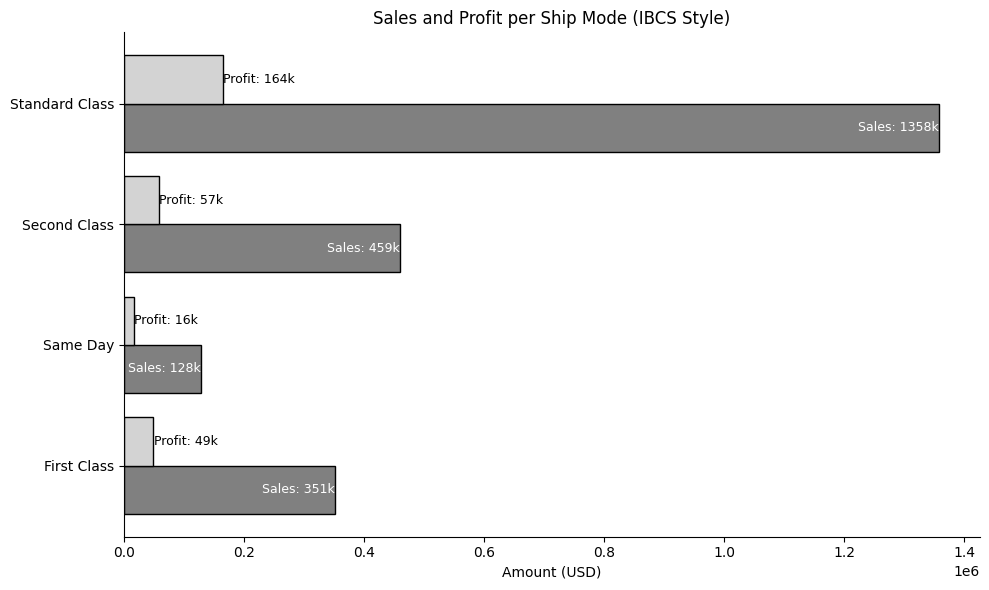

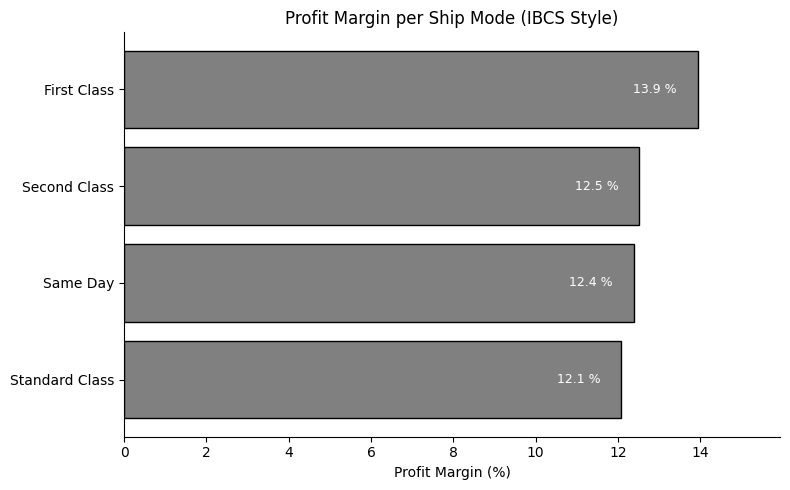

In [ ]:
plot_sales_profit_margin(agg_ship_mode_df, 'Ship Mode')


What is important here is the Profit Margin. We can see that there are no huge differences. So we can say that we did not found any clue where the losses come from... It seems not to depend on shipping method.

We cannot clearly identify an underperforming shipping class. First Class performs the best. We might revisit this category later if no more compelling issues are found elsewhere.

#####Segment
As next we will take a look at the various segments.

In [ ]:
# Grouping by segment
agg_segment_df = df.groupby('Segment')[['Sales', 'Profit']].sum()

agg_segment_df

# New column
agg_segment_df['Profit Margin (%)'] = (agg_segment_df['Profit'] / agg_segment_df['Sales']) * 100

agg_segment_df

,Sales,Profit,Profit Margin (%)
Segment,,,
Consumer,1.161401e+06,134119.2092,11.548050
Corporate,7.061464e+05,91979.1340,13.025506
Home Office,4.296531e+05,60298.6785,14.034269


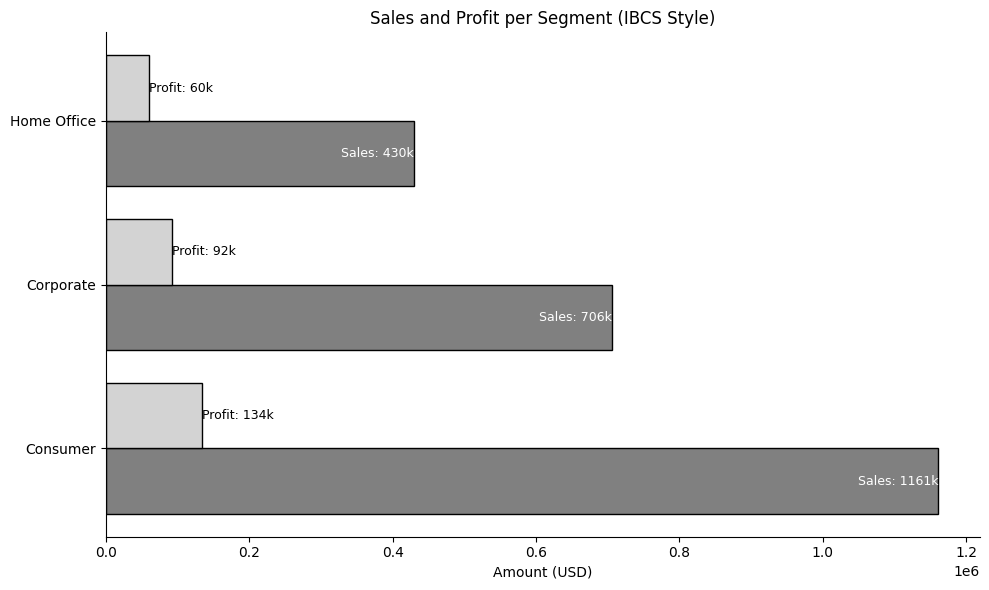

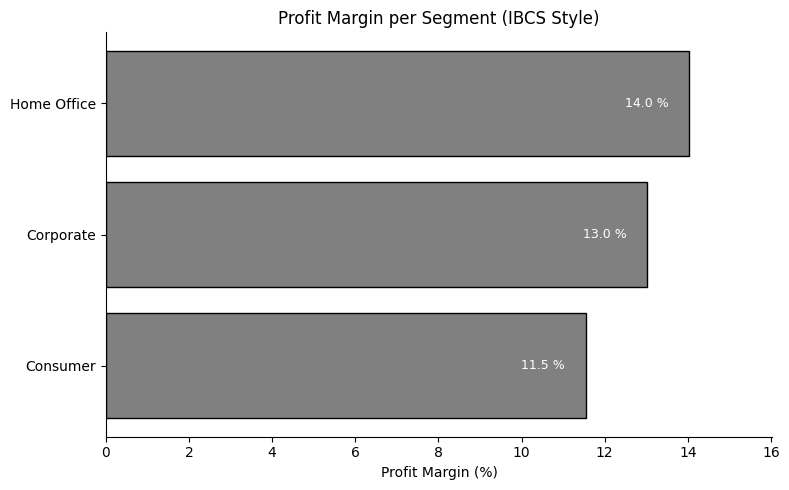

In [ ]:
plot_sales_profit_margin(agg_segment_df, 'Segment')

What do we conclude? Well, the Consumer segment performs the worst and it is the largest segment. Maby it is worth exploring later. Let’s move on and see if we can find something that stands out more.

#####Region
Lets take a look at the regions.

In [ ]:
# Grouping by segment
agg_region_df = df.groupby('Region')[['Sales', 'Profit']].sum()

# New column
agg_region_df['Profit Margin (%)'] = (agg_region_df['Profit'] / agg_region_df['Sales']) * 100

agg_region_df

,Sales,Profit,Profit Margin (%)
Region,,,
Central,501239.8908,39706.3625,7.921629
East,678781.2400,91522.7800,13.483399
South,391721.9050,46749.4303,11.934342
West,725457.8245,108418.4489,14.944831


Lets visual it

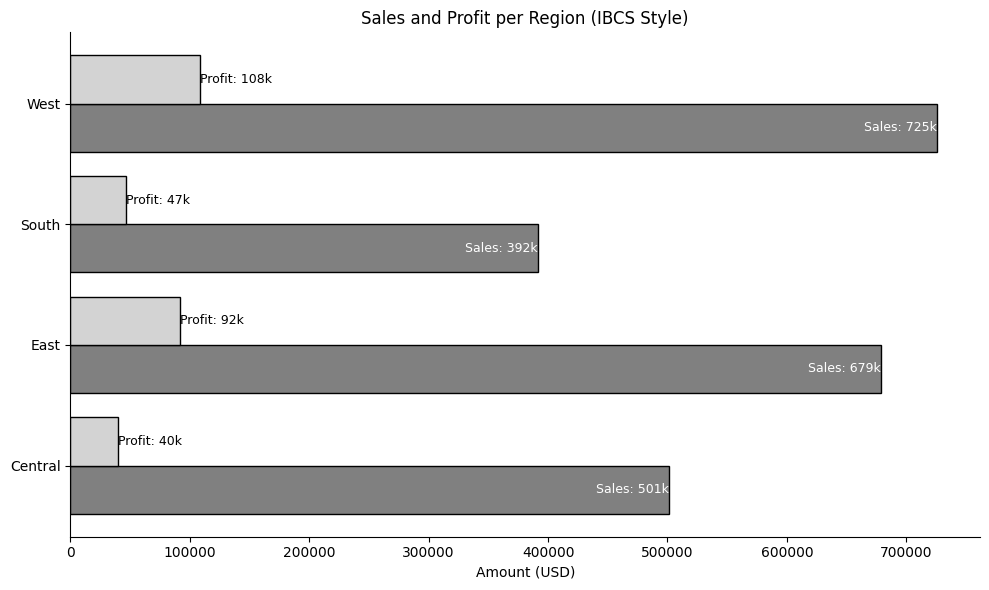

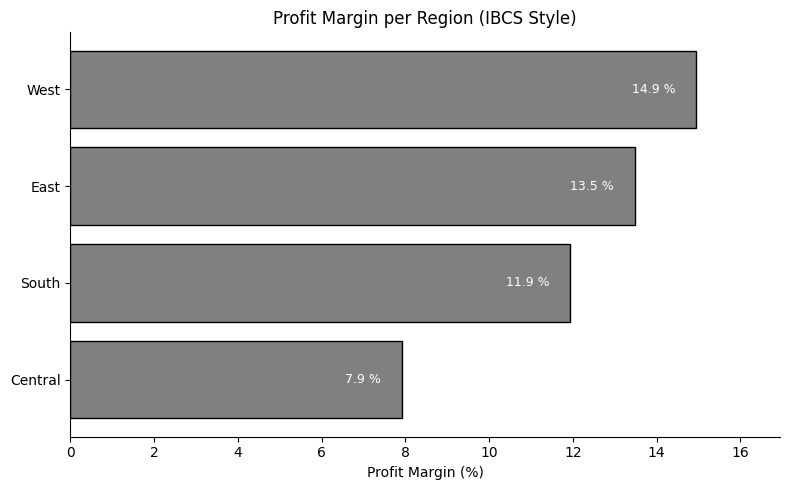

In [ ]:
plot_sales_profit_margin(agg_region_df, 'Region')

The visualization gives us the clearest clue so far: the Profit Margin in the Central region appears significantly worse than in the other regions. But before we follow this lead, let’s examine how the different product categories perform.

#####Category

In [ ]:
# Grouping by Category
agg_category_df = df.groupby('Category')[['Sales', 'Profit']].sum()

# New column
agg_category_df['Profit Margin (%)'] = (agg_category_df['Profit'] / agg_category_df['Sales']) * 100

agg_category_df

,Sales,Profit,Profit Margin (%)
Category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


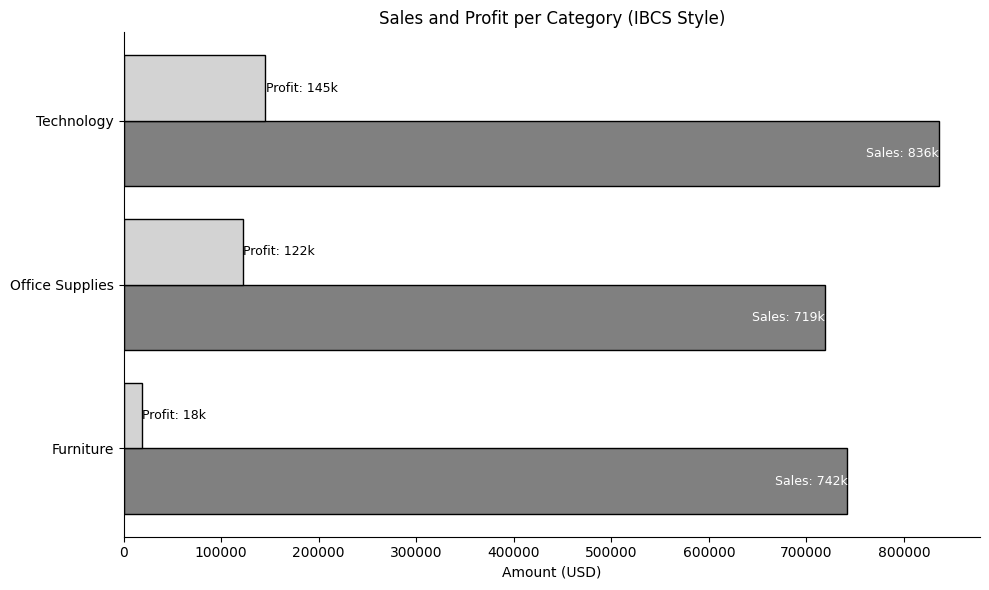

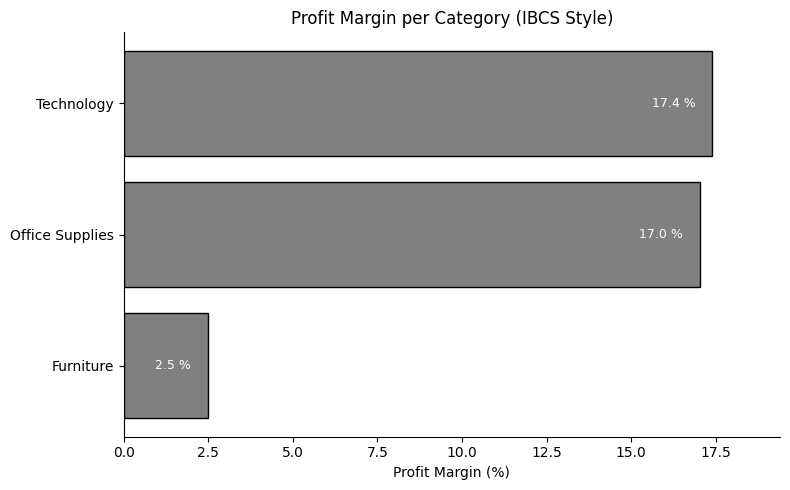

In [ ]:
plot_sales_profit_margin(agg_category_df, 'Category')

There must be something wrong with Furniture. However, we can't be sure—maybe it's typical for the profit margin to be that low with furniture. But I wouldn’t say so. Furniture pieces are expensive and take time and effort to sell, so the profit margin should actually be higher.

Let’s summarise the key findings so far:

- **The Central region appears to be the worst performing overall.**
- **The Furniture category clearly underperforms.**

It is important to emphasise that both of these findings are clearly visible in the data. Other insights that are less evident—such as Consumer being the weakest segment—have been omitted for now.



###Dimensional Drill Down (Round 1)

####Introduction: Dimensional Drill-Down
In Business Intelligence (BI) and data analysis, dimensional drill-down refers to the process of exploring data by navigating through different levels of granularity within a single dimension. This technique helps analysts uncover insights that are hidden behind high-level aggregates by breaking them down into more specific components.

A dimension represents a specific analytical perspective—such as Time, Product, Geography, or Customer. These dimensions often contain natural hierarchies, allowing users to move from summary views to detailed breakdowns. When such a hierarchy exists—such as Year → Quarter → Month or Category → Sub-Category → Product Name—this is called a hierarchical drill-down, which is a special case of dimensional drill-down.

For example, in the Product dimension, we may start at the category level (e.g. Furniture), drill down to sub-categories (e.g. Tables), and finally to individual products. This structured path reflects an inherent parent–child relationship between levels.

Dimensional drill-down is particularly useful when initial high-level insights indicate an anomaly or trend that requires further explanation. Rather than treating the system as a black box, it supports a structured, data-driven investigation that respects the logical organization of the data.

####Subcategories of Furniture Category
Among the three clues above, the third stands out the most in terms of magnitude ("The Furniture category underperforms clearly."). Therefore, we should analyze it first to uncover meaningful insights as efficiently as possible. Let's drill down into the sub-categories of Furniture

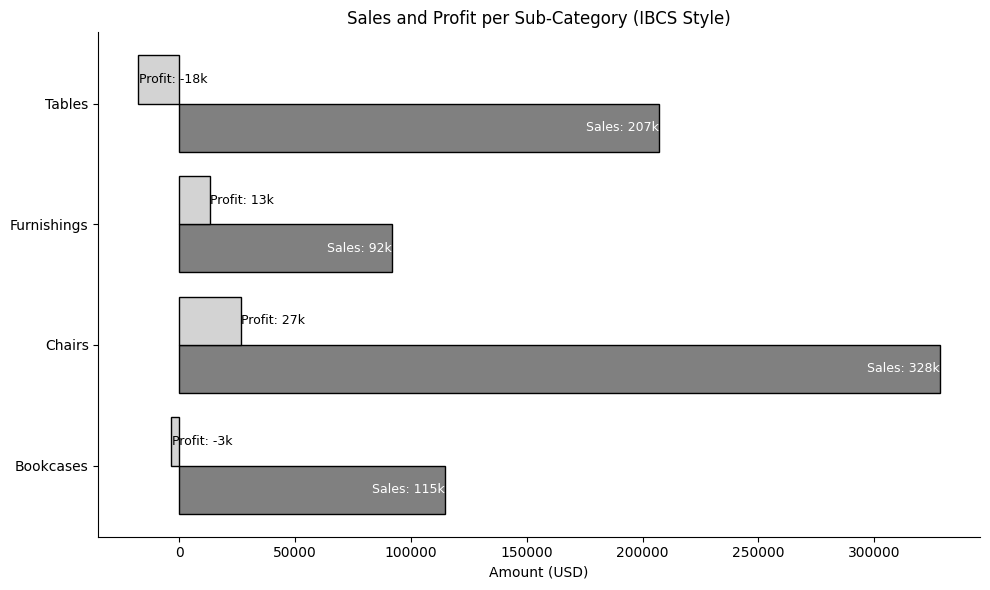

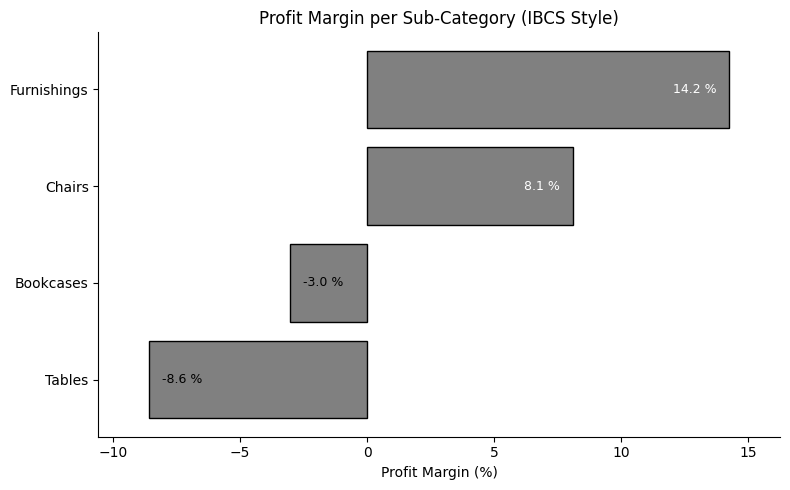

In [ ]:
# Filter only Furniture category
furniture_df = df[df['Category'] == 'Furniture']

# Group by Sub-Category and calculate Sales, Profit, and Profit Margin
agg_furniture_df = furniture_df.groupby('Sub-Category')[['Sales', 'Profit']].sum()
agg_furniture_df['Profit Margin (%)'] = (agg_furniture_df['Profit'] / agg_furniture_df['Sales']) * 100

# Run the plot function
plot_sales_profit_margin(agg_furniture_df, group_col='Sub-Category')


Wow. **There must be something wrong with the tables at the Superstore** ("They must be ugly or so"). The Insight is even bigger if we consider that table sales belong to second biggest sub-category within Furniture.

####States within the Central Region
Before we dive deeper into Tables, let's analyze the Central region and naturally drill down from there. We'll examine which state within the Central region is particularly unprofitable.

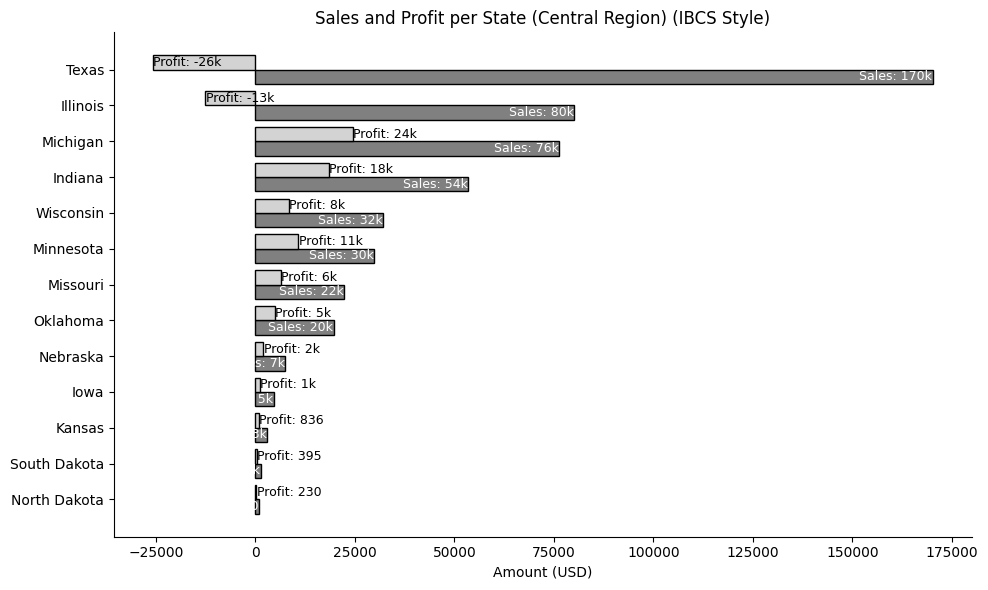

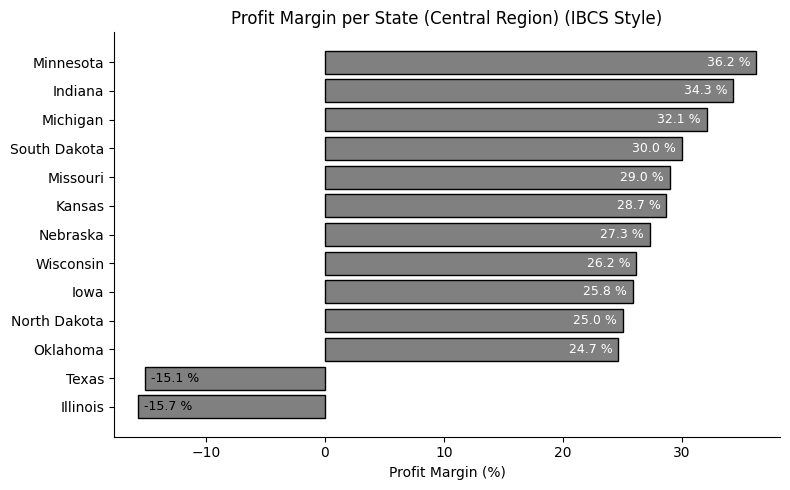

In [ ]:
# Filter to only include Central region
central_df = df[df['Region'] == 'Central']

# Aggregate by State
agg_central_states = central_df.groupby('State')[['Sales', 'Profit']].sum()

# Add Profit Margin column
agg_central_states['Profit Margin (%)'] = (agg_central_states['Profit'] / agg_central_states['Sales']) * 100

# Sort by Sales for better visualization
agg_central_states = agg_central_states.sort_values('Sales', ascending=True)

# Plot using your known function
plot_sales_profit_margin(agg_central_states, 'State (Central Region)')


**Wow, that’s clear. Texas and Illinois — shame on you!** 😄 Both states are performing catastrophically, and to make matters worse, a significant portion of total sales in the Central region comes from them.

####Individual Customers within the Consumer Segment
Remember we found out that the Consumer Segment performes the worts. Is there a child-category of consumers - Yes. It is the indivudual customer. However there must be a lot of them to visualise it. What should we do? Lets first check how many customers are there.

In [ ]:
import pandas as pd

# Load the Superstore dataset from URL (or replace with local path if needed)
url = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"
df = pd.read_csv(url, encoding='windows-1252')

# Count the number of unique customers
unique_customers = df['Customer ID'].nunique()

print(f"Number of unique customers: {unique_customers}")


Number of unique customers: 793


In [ ]:
import pandas as pd

# Load the dataset
url = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"
df = pd.read_csv(url, encoding='windows-1252')

# Group by Customer Name and sum the Sales
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False)

# Display the top 50 customers by sales volume
print(top_customers.head(50))


Customer ID  Customer Name       
SM-20320     Sean Miller             25043.0500
TC-20980     Tamara Chand            19052.2180
RB-19360     Raymond Buch            15117.3390
TA-21385     Tom Ashbrook            14595.6200
AB-10105     Adrian Barton           14473.5710
KL-16645     Ken Lonsdale            14175.2290
SC-20095     Sanjit Chand            14142.3340
HL-15040     Hunter Lopez            12873.2980
SE-20110     Sanjit Engle            12209.4380
CC-12370     Christopher Conant      12129.0720
TS-21370     Todd Sumrall            11891.7510
GT-14710     Greg Tran               11820.1200
BM-11140     Becky Martin            11789.6300
SV-20365     Seth Vernon             11470.9500
CJ-12010     Caroline Jumper         11164.9740
CL-12565     Clay Ludtke             10880.5460
ME-17320     Maria Etezadi           10663.7280
KF-16285     Karen Ferguson          10604.2660
BS-11365     Bill Shonely            10501.6530
EH-13765     Edward Hooks            10310.8800
JL-158

We see that the Sales are pretty evenly distributed, so there are probably no very important customers. But lets check how many we do have to analyse to include a substantial ammount of Sales withine Consumer Segement

In [ ]:
# Filter for Consumer segment only
consumer_df = df[df['Segment'] == 'Consumer']

# Group by customer and calculate sales
customer_sales = consumer_df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False)

# Total sales within Consumer segment
total_sales = customer_sales.sum()

# Sales from top 200 Consumer customers
top_n = 200
top_sales = customer_sales.head(top_n).sum()

# Percentage
sales_share = 100 * top_sales / total_sales

print(f"Top {top_n} Consumer customers account for {sales_share:.2f}% of Consumer segment sales.")

Top 200 Consumer customers account for 79.60% of Consumer segment sales.


Wow, we would need to consider around 200 customers to cover approximately 80% of the Consumer segment's sales – that’s not realistic :) As mentioned earlier, many customers contribute only a small portion of the total sales, so analyzing 200 customers individually and taking action on each one is neither efficient nor practical.

###Dimensional Drill Down (Round 2)
Here we are going to go one level deeper. Let's check if there are additional natural Parent-Child relations.

####Cities within Texas
We found that Texas is performing poorly. Maybe this is due to certain cities within the state. Let's check it out. One question that arises what if there are too many cities in texas to visualise it?

In [ ]:
# Filter for Texas only
texas_df = df[df['State'] == 'Texas']

# Count distinct cities
num_cities = texas_df['City'].nunique()

print(f"Number of unique cities in Texas: {num_cities}")


Number of unique cities in Texas: 54


That's too much to visualize. Let's analyze only the top cities in terms of sales. We'll filter the cities in Texas to include only those that together contribute at least 70% of the state's total sales.

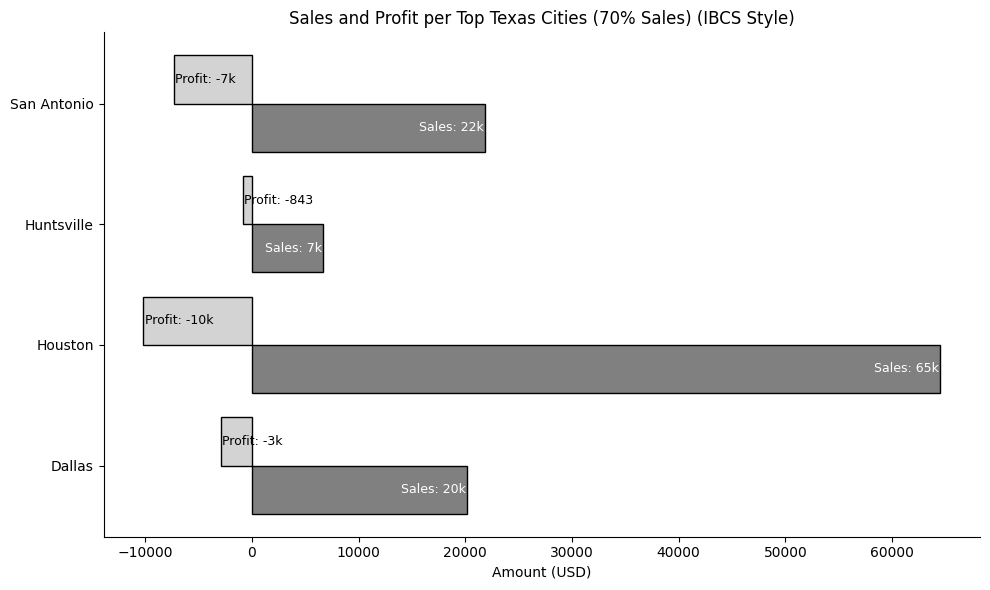

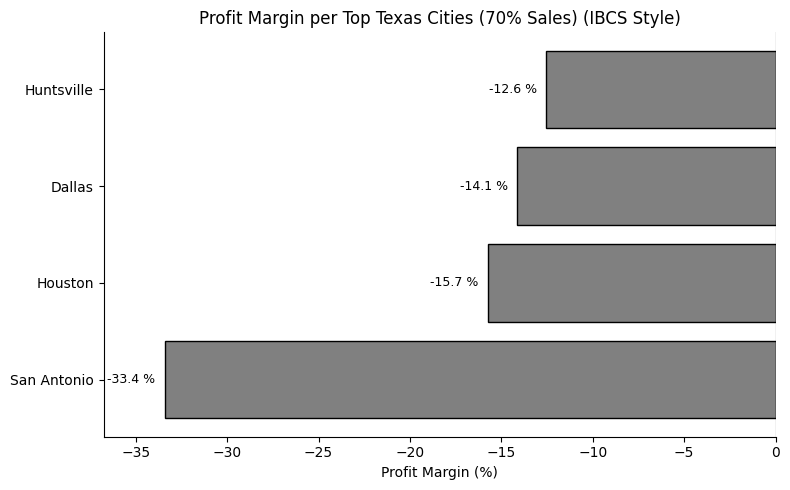

In [ ]:
# Filter data for Texas
texas_df = df[df['State'] == 'Texas']

# Group by City and sum Sales
city_sales = texas_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative percentage of sales
cumulative_sales = city_sales.cumsum() / city_sales.sum()

# Keep only cities contributing up to 70% of total sales
top_cities = cumulative_sales[cumulative_sales <= 0.70].index

# Filter original Texas data to include only those top cities
filtered_texas_df = texas_df[texas_df['City'].isin(top_cities)]

# Aggregate and calculate Profit Margin
agg_top_texas = filtered_texas_df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_top_texas['Profit Margin (%)'] = 100 * agg_top_texas['Profit'] / agg_top_texas['Sales']

# Visualize with your custom function
plot_sales_profit_margin_v2(agg_top_texas, 'Top Texas Cities (70% Sales)')#v2 version of function used becaue of all netative profit margins


It is evident that San Antonio performs exceptionally poorly in terms of profitability. This could potentially be explained by high logistical expenses, ineffective local management, or unfavorable market conditions.

####Cities within Illinois
We found that Illinois is performing poorly too. Maybe this is due to certain cities within the state. Let's check it out. Howewer we will take a look only and cities with high portion of sales within the state.

In [ ]:
# Filter for Illinois only
illinois_df = df[df['State'] == 'Illinois']

# Count distinct cities
num_cities = illinois_df['City'].nunique()

print(f"Number of unique cities in Illinois: {num_cities}")

Number of unique cities in Illinois: 33


That's too much to visualize. Let's analyze only the top cities in terms of sales. We'll filter the cities in Illinois to include only those that together contribute at least 70% of the state's total sales.

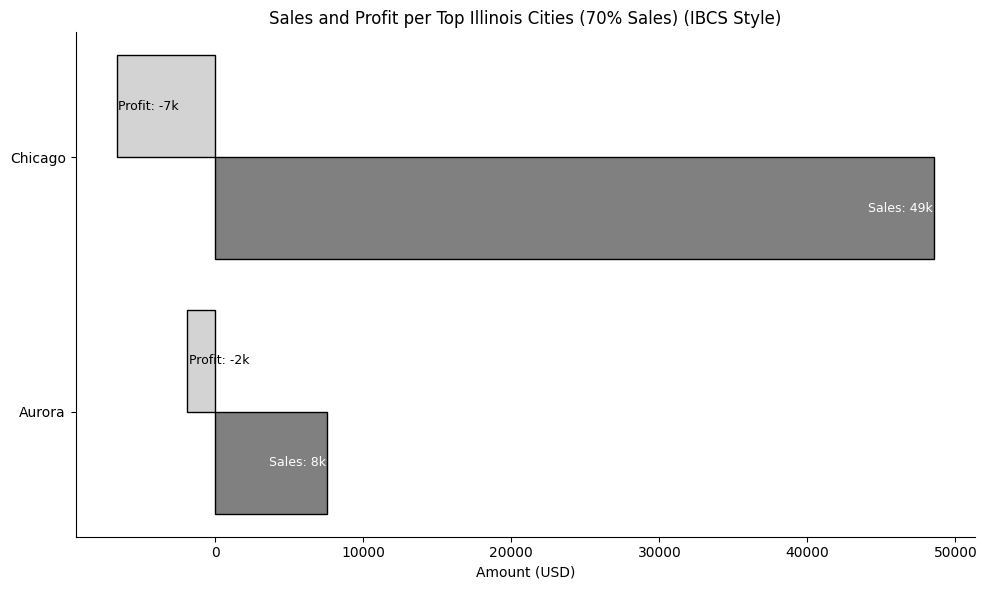

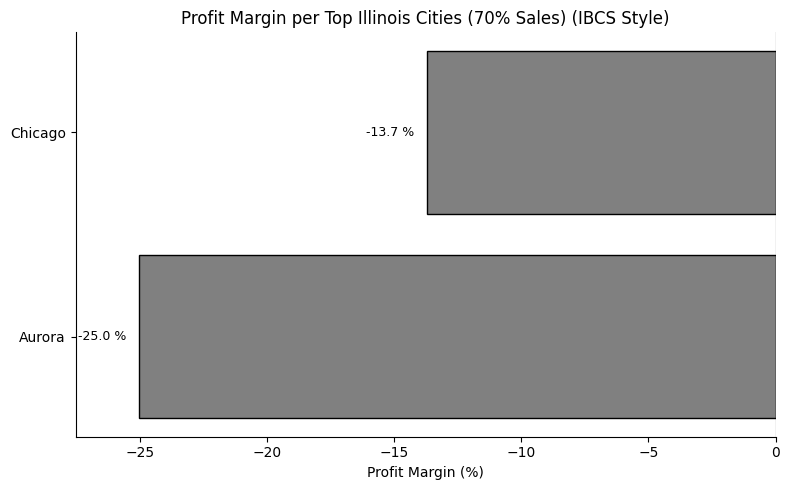

In [ ]:
# Filter data for Illinois
illinois_df = df[df['State'] == 'Illinois']

# Group by City and sum Sales
city_sales = illinois_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative percentage of sales
cumulative_sales = city_sales.cumsum() / city_sales.sum()

# Keep only cities contributing up to 70% of total sales
top_cities = cumulative_sales[cumulative_sales <= 0.70].index

# Filter original Illinois data to include only those top cities
filtered_illinois_df = illinois_df[illinois_df['City'].isin(top_cities)]

# Aggregate and calculate Profit Margin
agg_top_illinois = filtered_illinois_df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_top_illinois['Profit Margin (%)'] = 100 * agg_top_illinois['Profit'] / agg_top_illinois['Sales']

# Visualize with your custom function
plot_sales_profit_margin_v2(agg_top_illinois, 'Top Illinois Cities (70% Sales)')


It is evident that both Aurora and Chicago are unprofitable, but Aurora performs exceptionally poorly in terms of profit margin. This suggests that, within Illinois, Aurora could be a key driver of the state’s negative performance.
Therefore, it might be worthwhile to take a closer look at Aurora — understanding what’s happening there could provide valuable insights, not only for Illinois but potentially for the entire Central region.

####Distinct Table Models within Table Subcategory
Let's see if the Table Sub-Category is so unprofitable becaues of some special Table model. At first lets se how many table models we have.

In [ ]:
# Filter for Tables only
tables_df = df[df['Sub-Category'] == 'Tables']

# Count unique product names (i.e., individual table models)
num_table_models = tables_df['Product Name'].nunique()

print(f"Number of unique table models: {num_table_models}")

Number of unique table models: 56


In [ ]:
# Filter for tables only
tables_df = df[df['Sub-Category'] == 'Tables']

# Group by Product Name and calculate total Sales and Profit
top_tables = tables_df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

# Optional: add Profit Margin
top_tables['Profit Margin (%)'] = 100 * top_tables['Profit'] / top_tables['Sales']

# Show top 10 table products
top_tables.head(10)


,Sales,Profit,Profit Margin (%)
Product Name,,,
Bretford Rectangular Conference Table Tops,12995.2915,-327.2331,-2.518090
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.6400,-2876.1156,-29.000000
Bush Advantage Collection Racetrack Conference Table,9544.7250,-1934.3976,-20.266667
Chromcraft Round Conference Tables,8209.0590,-189.9761,-2.314225
Hon 94000 Series Round Tables,7404.5000,-681.2140,-9.200000
Bretford CR4500 Series Slim Rectangular Table,7242.7680,-532.7613,-7.355769
"Bevis Oval Conference Table, Walnut",6942.0680,-856.0144,-12.330827
Bretford CR8500 Series Meeting Room Furniture,6776.5620,461.1270,6.804734
Balt Solid Wood Round Tables,6518.7540,-1201.0581,-18.424658


Sales of the table is evenly distributed, this means that there are a lot of tables we would like to explore. Lets calculate how many top sold Tables make up 70 percent of Tables Sales.

In [ ]:
# Filter for Sub-Category "Tables"
tables_df = df[df['Sub-Category'] == 'Tables']

# Group by Product Name and sum Sales
table_sales = tables_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative percentage of sales
cumulative_sales = table_sales.cumsum() / table_sales.sum()

# Get count of products contributing to 70% of sales
num_top_products = (cumulative_sales <= 0.70).sum()

print(f"Number of unique table models contributing to 70% of total table sales: {num_top_products}")


Number of unique table models contributing to 70% of total table sales: 24


That is a lot of different Tables. So it is not profitable to concentrate on specific Table models...

###Summary of the Insights of the Dimansional Drill Down
After Analysing all the important Dimansions with Parent-Child like relationships we came to following conclusions:

**The Central region performs the worst overall.**
This is primarily due to two states: Texas and Illinois, both of which show significantly lower performance compared to other states in the region.
Without these two states, the Central region’s performance would be considerably better.
In both Texas and Illinois, most major cities report losses. However, in Texas, San Antonio stands out as the worst-performing city by a significant margin. In Illinois, Aurora has the lowest profit margin.

**The Furniture category is the weakest performer.**
This is mainly due to the subcategory Tables, with Bookcases also contributing to the poor performance, though to a lesser extent.

###Introduction into Cross-Dimensional Drill Down
Until now, we have only performed dimensional drill-down—that is, exploring different levels of granularity within a single dimension (e.g. Category → Sub-Category → Product).

Now, we will move to a cross-dimensional drill-down, where we intersect two or more dimensions. For example, we will analyze each Product Category (Dimension 1) in more detail within the context of the State of Texas (Dimension 2).

What are we hoping to discover?
If we find that Furniture is unprofitable in Texas, that would not be surprising. A poorly performing state is unlikely to outperform others in an already weak category.

However, we are looking for something more meaningful:
A case where Texas performs poorly in a product category that generally performs well elsewhere.
Such deviations from the overall trend may reveal state-specific issues or opportunities for improvement.

####Cross Dimensional Drill-Down: TEXAS

#####Category-Level Analysis for Texas

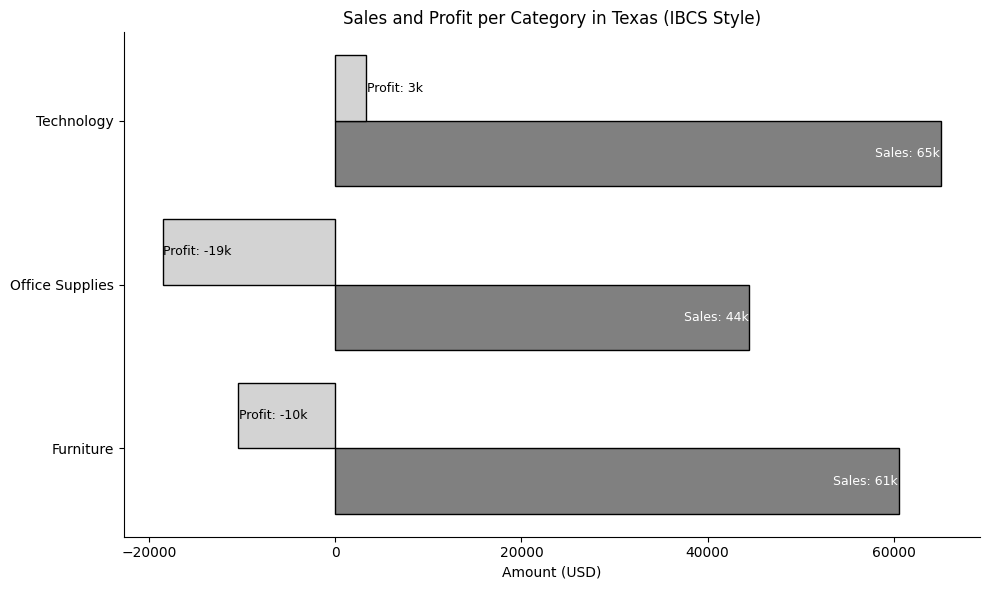

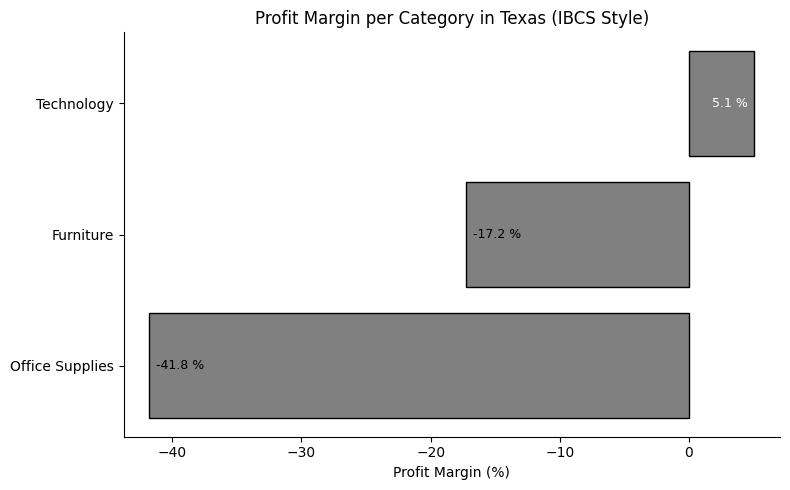

In [ ]:
# Filter data for Texas
texas_df = df[df['State'] == 'Texas']

# Group by Category and aggregate Sales and Profit
agg_texas_category = texas_df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

# Calculate Profit Margin
agg_texas_category['Profit Margin (%)'] = 100 * agg_texas_category['Profit'] / agg_texas_category['Sales']

# Visualize
plot_sales_profit_margin(agg_texas_category, 'Category in Texas')



We observe a clear anomaly in the Office Supplies category. **While Office Supplies are generally profitable across the entire Superstore dataset, Texas stands out as a negative outlier—reporting severe losses in this otherwise successful category.**

#####Segment-Level Analysis for Texas

Let's do the same for Segment

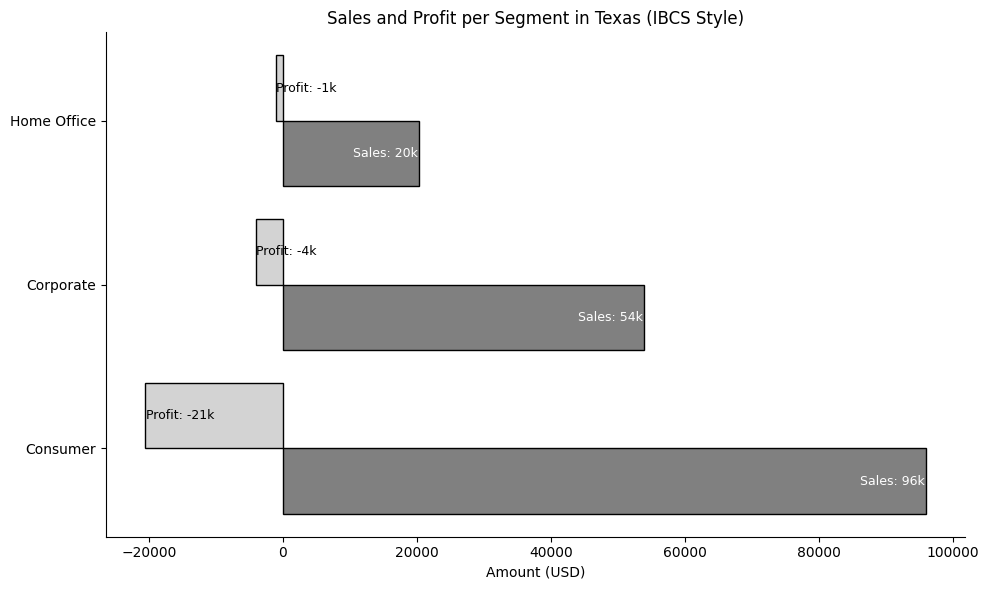

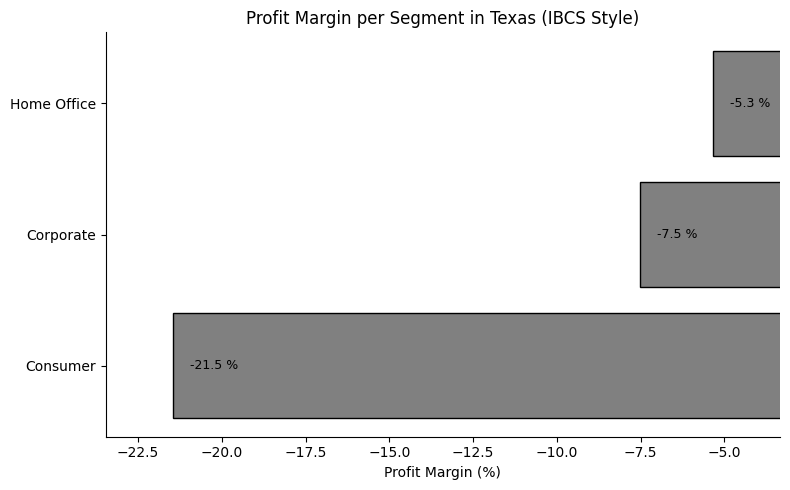

In [ ]:
# Filter data for Texas
texas_df = df[df['State'] == 'Texas']

# Group by Segment and aggregate Sales and Profit
agg_texas_segment = texas_df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

# Calculate Profit Margin
agg_texas_segment['Profit Margin (%)'] = 100 * agg_texas_segment['Profit'] / agg_texas_segment['Sales']

# Visualize
plot_sales_profit_margin(agg_texas_segment, 'Segment in Texas')


We can see that the Consumer Segment is performing horribly in comparison to overall Superstore performance (-21.5 in comparison to +11.5). Let's visualise it:

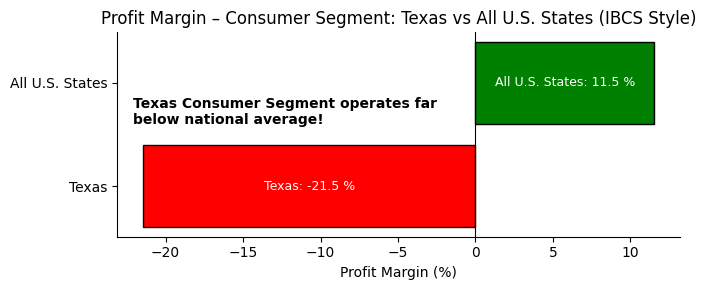

In [ ]:
import matplotlib.pyplot as plt

# Filter Consumer Segment
consumer_df = df[df['Segment'] == 'Consumer']

# Gesamt (alle Staaten)
agg_all = consumer_df.agg({'Sales': 'sum', 'Profit': 'sum'})

# Nur Texas
agg_texas = consumer_df[consumer_df['State'] == 'Texas'].agg({'Sales': 'sum', 'Profit': 'sum'})

# Profit Margins berechnen
pm_all = 100 * agg_all['Profit'] / agg_all['Sales']
pm_texas = 100 * agg_texas['Profit'] / agg_texas['Sales']
delta = pm_texas - pm_all

# Daten für Plot
labels = ['Texas', 'All U.S. States']
values = [pm_texas, pm_all]
colors = ['red', 'green']  # Texas = rot, All = grün

# Plot
fig, ax = plt.subplots(figsize=(7, 3))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Beschriftungen in den Balken
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# X-Limits holen für Textpositionierung
xlim = ax.get_xlim()

# Headline (anstelle Delta-Text) oben links
ax.text(
    xlim[0] + 1,
    0.60,  # vorher: 1.15 → etwas weiter unten
    'Texas Consumer Segment operates far\nbelow national average!',
    color='black',
    fontsize=10,
    weight='bold'
)

# Titel und Stil
ax.set_title('Profit Margin – Consumer Segment: Texas vs All U.S. States (IBCS Style)')
ax.set_xlabel('Profit Margin (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


**The important finding here ist that Texas is very bad when it comes to the Consumer Segment.**
The Plot above looks pretty. Maby we can use it later in the final presentation for the Manager :)

#####How Product Categories Contribute to Consumer Segment Losses in Texas

Texas shows particularly poor performance in both the Office Supplies category and the Consumer segment. This correlation raises suspicion — it is possible that a large share of Consumer segment loss in Texas comes from Office Supplies. To investigate this, we will now analyze the distribution of product categories within the Consumer segment, based on Sales and Profit.

In [ ]:
# Filter for Texas and Consumer Segment
df_texas_consumer = df[(df['State'] == 'Texas') & (df['Segment'] == 'Consumer')]

# Group by Category
agg = df_texas_consumer.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

agg

,Sales,Profit
Category,,
Furniture,35688.278,-5538.8004
Office Supplies,28874.786,-16156.5317
Technology,31413.314,1098.9554


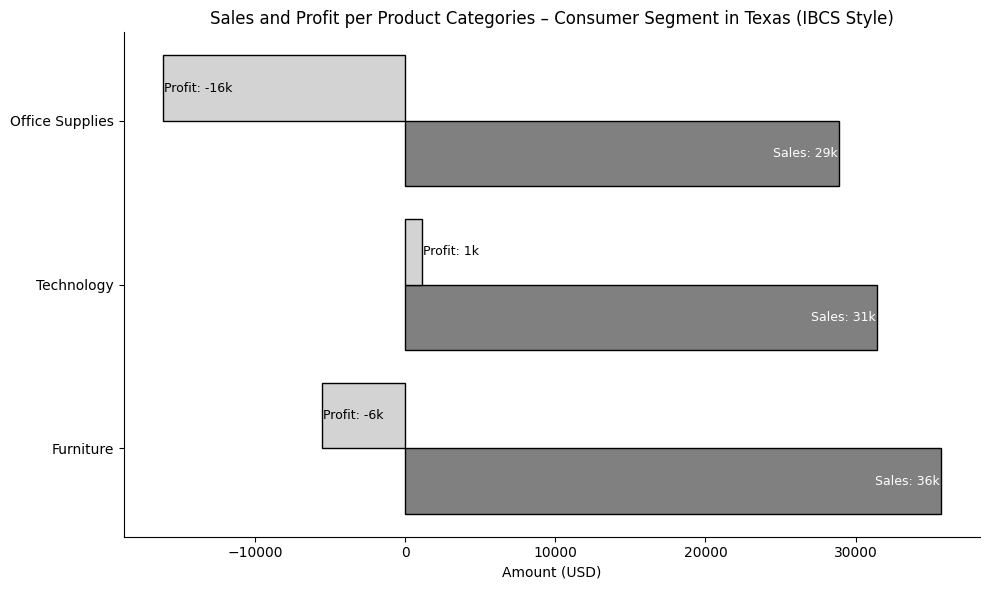

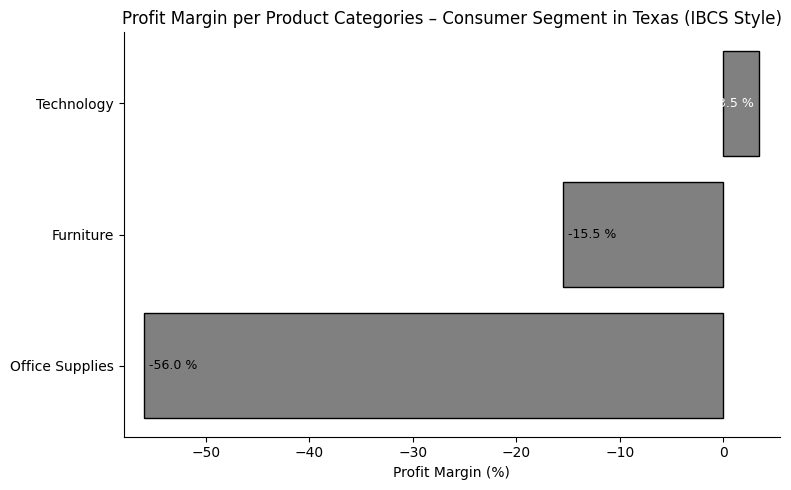

In [ ]:
# Profit Margin
agg['Profit Margin (%)'] = 100 * agg['Profit'] / agg['Sales']

# Sort by Sales
agg = agg.sort_values(by='Sales', ascending=False)

# Plotting
plot_sales_profit_margin(agg, 'Product Categories – Consumer Segment in Texas')


If we take a look at the first plot above (Sales and Profit per Product Category...), we can see that Office Supplies incurred a loss of around 16k, while the other two categories combined account for only about 5k in losses (1k gain vs. 6k loss). This indicates that a significant portion of the losses in the Consumer segment can be attributed to the Office Supplies category.

Therefore, the first step should be to speak with the individuals responsible for this category in Texas. However, as a second step, it may also be worthwhile to review the entire segment—provided there are enough resources available.
It is essential to start with the Office Supplies category.

Maby we can visualise it a little bit better:

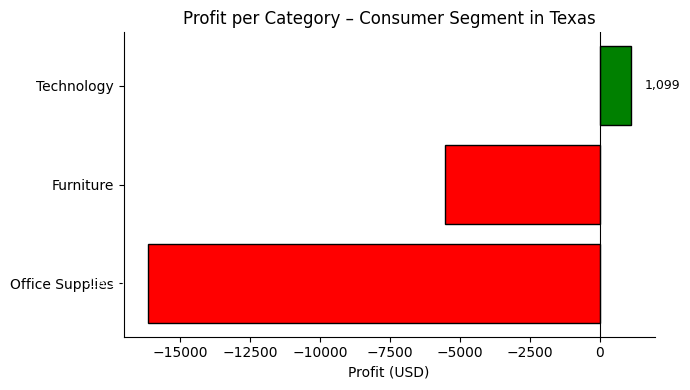

In [ ]:
import matplotlib.pyplot as plt

# Daten vorbereiten
profits = agg['Profit'].sort_values()
colors = ['red' if p < 0 else 'green' for p in profits]

# Balkendiagramm
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.barh(profits.index, profits.values, color=colors, edgecolor='black')

# Beschriftungen in den Balken
for bar in bars:
    width = bar.get_width()
    ax.text(
        width - 500 if width < 0 else width + 500,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',
        ha='right' if width < 0 else 'left',
        va='center',
        color='white' if width < 0 else 'black',
        fontsize=9
    )

# Stil
ax.set_title('Profit per Category – Consumer Segment in Texas')
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel('Profit (USD)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


**The key finding here is that the Office Supplies category in the state of Texas requires immediate attention.
It is the main reason why the Consumer segment performs so poorly in this state. If we address the issues within Office Supplies in Texas, we will likely resolve the majority of the problems affecting the entire Consumer segment.**

Of course, it's possible that Technology and Furniture categories are also underperforming compared to other states. However, given that resources are limited, we need to focus on what matters most.

Let’s apply the 80/20 rule:
With 20% of the effort, we can solve 80% of the problem. 😊

A Converstion with the responsible stuff will likely reweal the problems with this Product category. Howewer maby it is possible to find some reasons for it in the dataset. lets explore the Discount when it comes to Office supplies.

#####Discount in Texas in Comparison to All of the US States

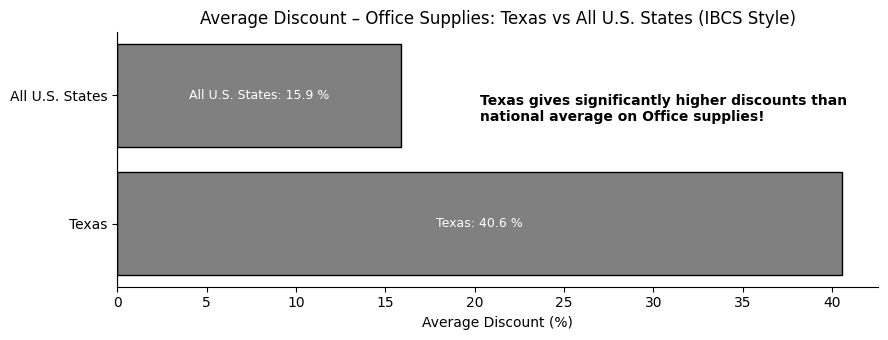

In [ ]:
import matplotlib.pyplot as plt

# Durchschnittlicher Discount berechnen
avg_discount_texas = df[
    (df['State'] == 'Texas') &
    (df['Segment'] == 'Consumer') &
    (df['Category'] == 'Office Supplies')
]['Discount'].mean() * 100

avg_discount_all = df[
    (df['Segment'] == 'Consumer') &
    (df['Category'] == 'Office Supplies')
]['Discount'].mean() * 100

# Daten für Balken
labels = ['Texas', 'All U.S. States']
values = [avg_discount_texas, avg_discount_all]
colors = ['gray', 'gray']

# Plot
fig, ax = plt.subplots(figsize=(9, 3.5))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Balkenbeschriftung
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# Headline nach rechts und weiter nach unten verschoben
ax.text(
    max(values) * 0.5, 0.8,
    'Texas gives significantly higher discounts than\nnational average on Office supplies!',
    color='black',
    fontsize=10,
    weight='bold'
)

# Titel und Achsen
ax.set_title('Average Discount – Office Supplies: Texas vs All U.S. States (IBCS Style)')
ax.set_xlabel('Average Discount (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Let's recap everything. We observed that Texas performs poorly in the Office Supplies category. But what could be the reason?
To get closer to the root cause, we need to look at what Texas does differently compared to other states. And indeed, we found something: Texas offers significantly higher discounts on Office Supplies.

This might point to a flawed discounting strategy in Texas. It’s a topic that needs further investigation — but we won’t pursue it here. Instead, we leave that to the management. It's also likely that the dataset doesn't contain enough detailed information to fully explain what’s going on.

However, we were able to narrow down the problem, which already provides valuable insight and a concrete starting point for decision-makers.

Exercise: Do the same Analysis for Illinois which shows simmilar poor results within the Centra Region.

####Cross Dimensional Drill-Down: Illinois

Exercise: Lets do this part by yourself using the previous Chapter as refrence.

####Cross Dimensional Drill-Down: Tables

#####Region-Level Analysis for Tables

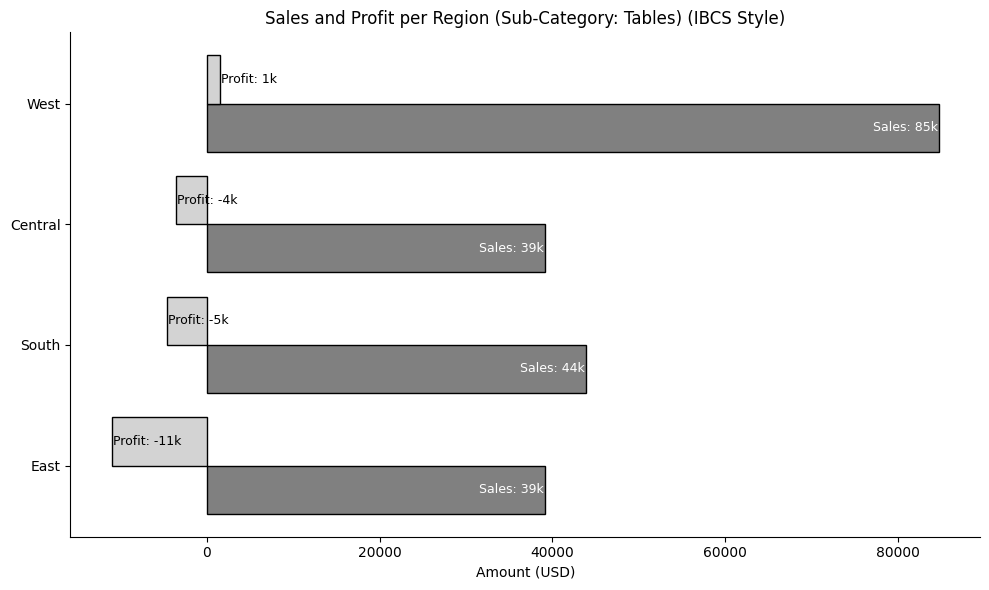

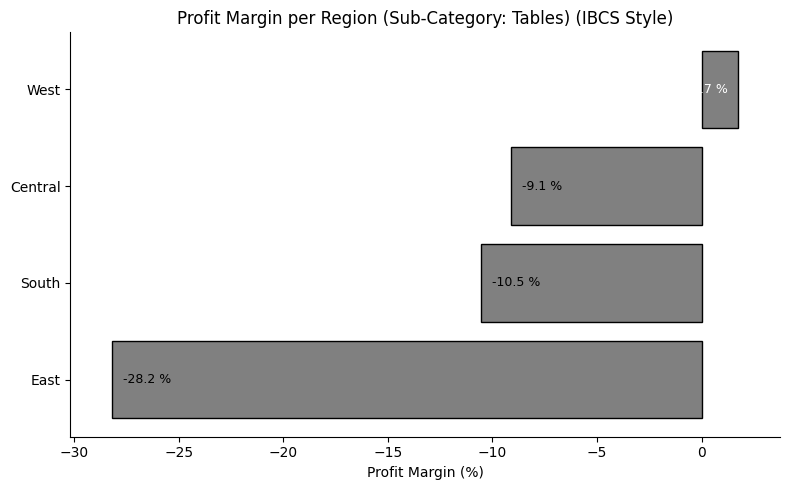

In [ ]:
# Filter nur für "Tables"
tables_df = df[df['Sub-Category'] == 'Tables']

# Gruppierung nach Region
agg_tables_region = tables_df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_tables_region['Profit Margin (%)'] = 100 * agg_tables_region['Profit'] / agg_tables_region['Sales']

# Sortieren nach Profit Margin
agg_tables_region = agg_tables_region.sort_values('Profit Margin (%)')

# Visualisieren mit bekannter Funktion
plot_sales_profit_margin(agg_tables_region, 'Region (Sub-Category: Tables)')


**We can see here that the East region performes very bad. I expected the Central region to be the worst but somehow the East Region did a very poor job when it comes to tables.**

Let visual this Insight even more clearly:

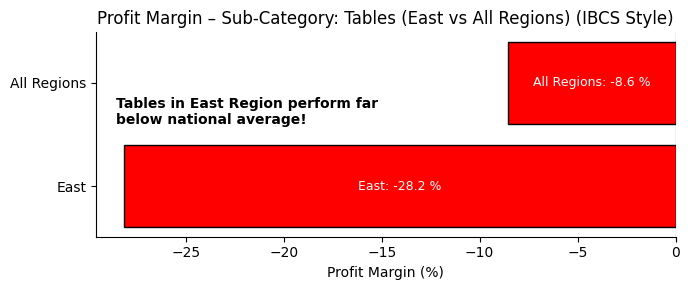

In [ ]:
import matplotlib.pyplot as plt

# Filter auf "Tables"
tables_df = df[df['Sub-Category'] == 'Tables']

# Aggregation für alle Regionen (nationaler Durchschnitt)
agg_all = tables_df.agg({'Sales': 'sum', 'Profit': 'sum'})

# Aggregation nur für East-Region
agg_east = tables_df[tables_df['Region'] == 'East'].agg({'Sales': 'sum', 'Profit': 'sum'})

# Profit Margins berechnen
pm_all = 100 * agg_all['Profit'] / agg_all['Sales']
pm_east = 100 * agg_east['Profit'] / agg_east['Sales']

# Daten vorbereiten
labels = ['East', 'All Regions']
values = [pm_east, pm_all]
colors = ['red' if v < 0 else 'green' for v in values]

# Plot
fig, ax = plt.subplots(figsize=(7, 3))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Beschriftungen
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# Headline-Text innerhalb der Fläche
xlim = ax.get_xlim()
ax.text(
    x=xlim[0] + 1,
    y=0.60,
    s='Tables in East Region perform far\nbelow national average!',
    color='black',
    fontsize=10,
    weight='bold'
)

# Titel und Stil
ax.set_title('Profit Margin – Sub-Category: Tables (East vs All Regions) (IBCS Style)')
ax.set_xlabel('Profit Margin (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()




The Poor performance of the East when it comes to tables has to be analysed in more detail by the Managers. Howewer lets see if we can find out something from the data that could be responsible for this. Our first thought is Discount (again).

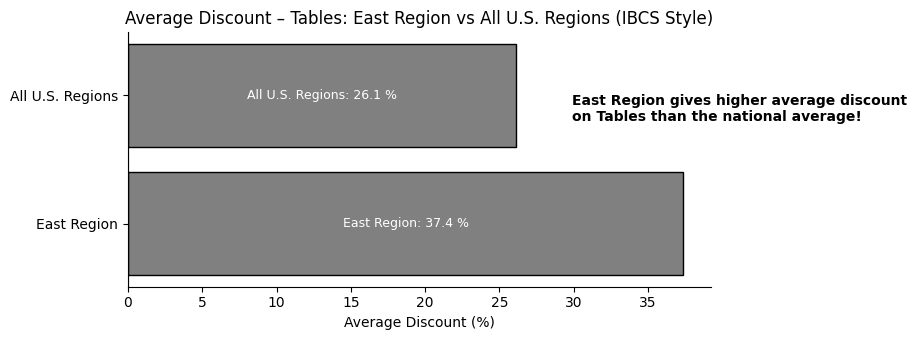

In [ ]:
import matplotlib.pyplot as plt

# Filter für Tables
tables_df = df[df['Sub-Category'] == 'Tables']

# Durchschnittlicher Discount für ganz USA (alle Regionen)
avg_discount_all = tables_df['Discount'].mean() * 100

# Durchschnittlicher Discount nur für East Region
avg_discount_east = tables_df[tables_df['Region'] == 'East']['Discount'].mean() * 100

# Plot vorbereiten
labels = ['East Region', 'All U.S. Regions']
values = [avg_discount_east, avg_discount_all]
colors = ['gray', 'gray']

# Plot
fig, ax = plt.subplots(figsize=(9, 3.5))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Balkenbeschriftung
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# Headline / Hinweistext
ax.text(
    max(values) * 0.8, 0.8,
    'East Region gives higher average discount\non Tables than the national average!',
    color='black',
    fontsize=10,
    weight='bold'
)

# Titel und Achsen
ax.set_title('Average Discount – Tables: East Region vs All U.S. Regions (IBCS Style)')
ax.set_xlabel('Average Discount (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


We can say at this point that the discount policy should be reconsidered in the East Region.

#####Segment-Level Analysis for Tables
Lets analyse how Tables perform within different Segments.

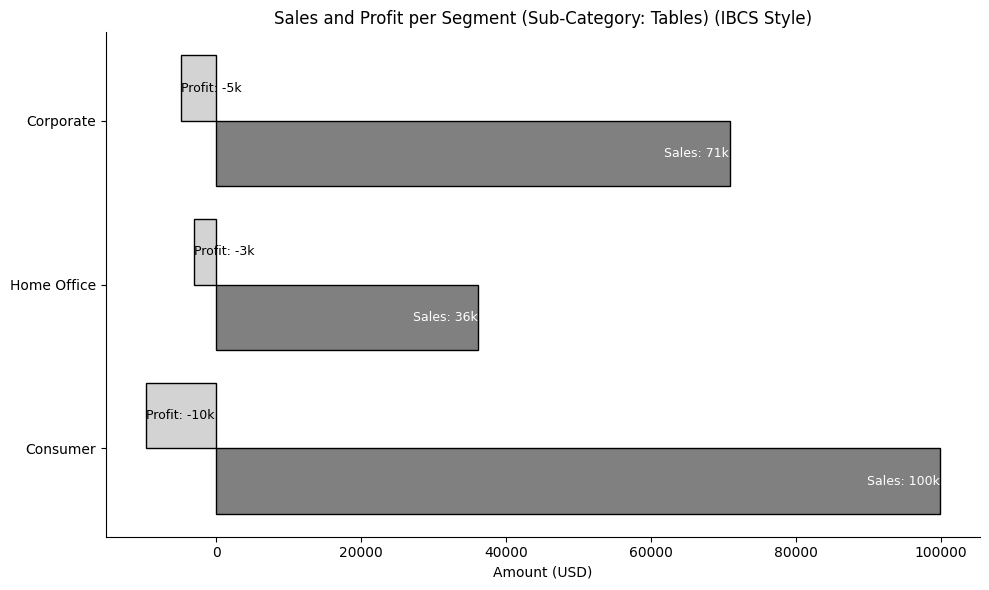

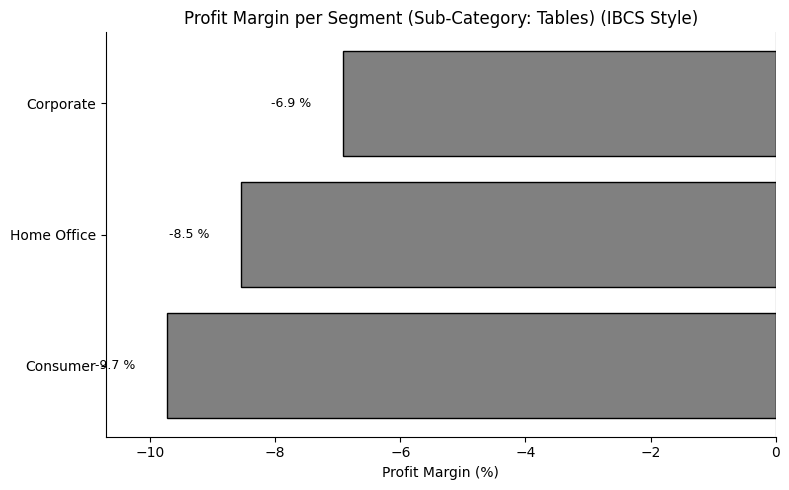

In [ ]:
# Filter nur für "Tables"
tables_df = df[df['Sub-Category'] == 'Tables']

# Gruppierung nach Segment
agg_tables_segment = tables_df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_tables_segment['Profit Margin (%)'] = 100 * agg_tables_segment['Profit'] / agg_tables_segment['Sales']

# Sortieren nach Profit Margin
agg_tables_segment = agg_tables_segment.sort_values('Profit Margin (%)')

# Visualisieren mit bekannter Funktion
plot_sales_profit_margin_v2(agg_tables_segment, 'Segment (Sub-Category: Tables)')


We can see that the losses are relatively evenly distributed across the segments, so at the moment, there is no clear reason to focus on any specific segment regarding the Tables issue.

####Cross-Dimensional Drill Down: Tables in the East
In the previous chapter, we found that Table sales perform especially poorly in the East region. We now take a step further to analyze why this is the case by drillin further down.

#####State-Level Analysis for Tables in the East
Let's find out if the losses with Tables come mostly from one or few countries in the East.

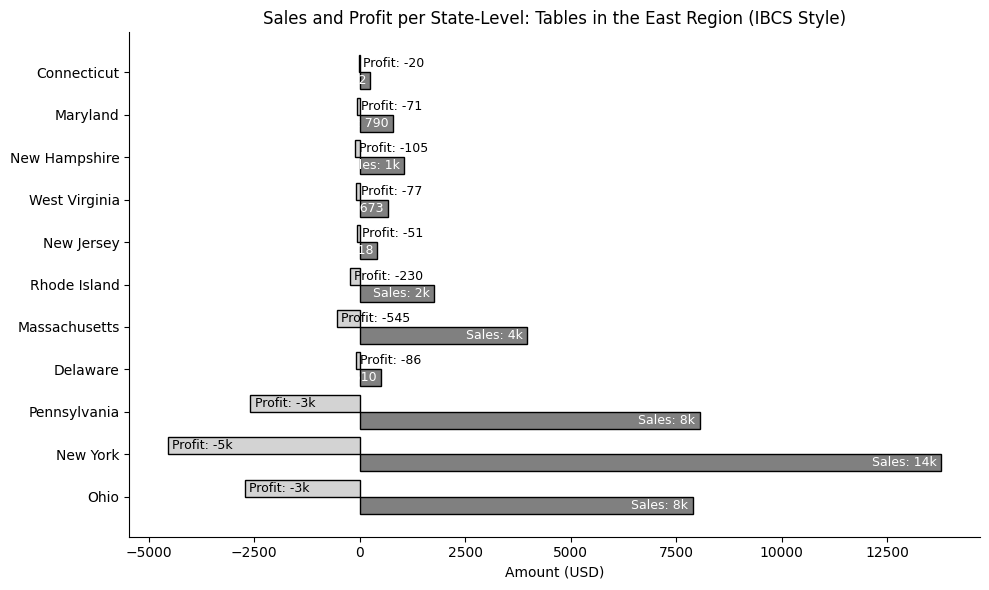

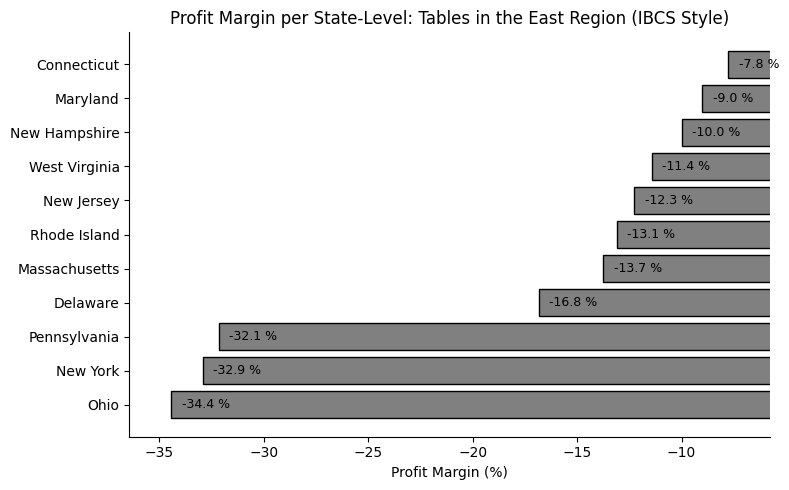

In [ ]:
# Filter for Tables only
tables_df = df[df['Sub-Category'] == 'Tables']

# Further filter for East Region only
tables_east_df = tables_df[tables_df['Region'] == 'East']

# Group by State
agg_tables_east_states = tables_east_df.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_tables_east_states['Profit Margin (%)'] = 100 * agg_tables_east_states['Profit'] / agg_tables_east_states['Sales']

# Sort by Profit Margin
agg_tables_east_states = agg_tables_east_states.sort_values('Profit Margin (%)')

# Visualize
plot_sales_profit_margin(agg_tables_east_states, 'State-Level: Tables in the East Region')


**The largest states — Ohio, New York, and Pennsylvania — stand out as particularly negative examples. Management should investigate these cases further.** However maby way can get a clue about the reasons for bad performance of the Big states regarding profit from the data. Let's therfore analyse if Pensylvania, New York and Ohio give more discounts than in the rest of the U.S.

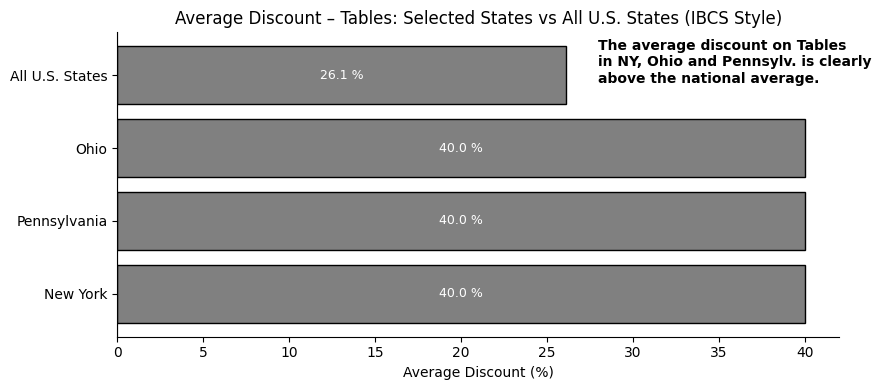

In [ ]:
import matplotlib.pyplot as plt

# Target Sub-Category for the analysis
subcategory = 'Tables'

# Focused states within the East region
states = ['New York', 'Pennsylvania', 'Ohio']

# Calculate average discount per state for the selected sub-category
state_discounts = [
    df[(df['State'] == state) & (df['Sub-Category'] == subcategory)]['Discount'].mean() * 100
    for state in states
]

# Calculate national average discount for the sub-category
avg_discount_all = df[df['Sub-Category'] == subcategory]['Discount'].mean() * 100

# Prepare data for plotting
labels = states + ['All U.S. States']
values = state_discounts + [avg_discount_all]
colors = ['gray'] * len(labels)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(9, 4))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Add value labels inside the bars
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# Add insight annotation (adjust text as needed based on results)
ax.text(
    max(values) * 0.7, 2.9,
    'The average discount on Tables\nin NY, Ohio and Pennsylv. is clearly\nabove the national average.',
    color='black',
    fontsize=10,
    weight='bold'
)

# Chart title and axis formatting
ax.set_title('Average Discount – Tables: Selected States vs All U.S. States (IBCS Style)')
ax.set_xlabel('Average Discount (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


**We see that the Discounts are probably responsible for below awerage performance of Tables in Ohio, Pennsylvania and New York.**

####Summary of the Insights of the Cross-Dimensional Drill Down
Texas performs poorly overall. By far the worst-performing product category in Texas is Office Supplies, which should be addressed immediately. One possible reason for this underperformance could be excessively high discounts.

Tables also perform poorly. The East Region stands out as the worst region in terms of table sales performance. Within this region, the three states of Ohio, New York, and Pennsylvania are the main contributors to the negative results. These states are the reason why the East Region appears especially weak regarding Tables. A likely cause may again be high discount levels observed in these states.
Management should further investigate the Table sub-category performance in these states.


#Step 4. Data Presentation

The results of the analyses are presented in a dedicated chapter using clear visualizations and concrete recommendations for action. We apply the IBCS design principles to communicate decision alternatives to management in a simple and impactful way. The focus is on answering the following question:

“How much could we save by cancelling sales of unprofitable products in specific regions?”

This clear managerial question represents the final link in our analysis and directly prepares the ground for the fifth and final step of the CPA model: Taking Action. It completes the data-driven decision-making process by providing concrete insights for managerial choices.

##Presentation in Jupyter Notebook Format

###Central region performs poorly in terms of profit

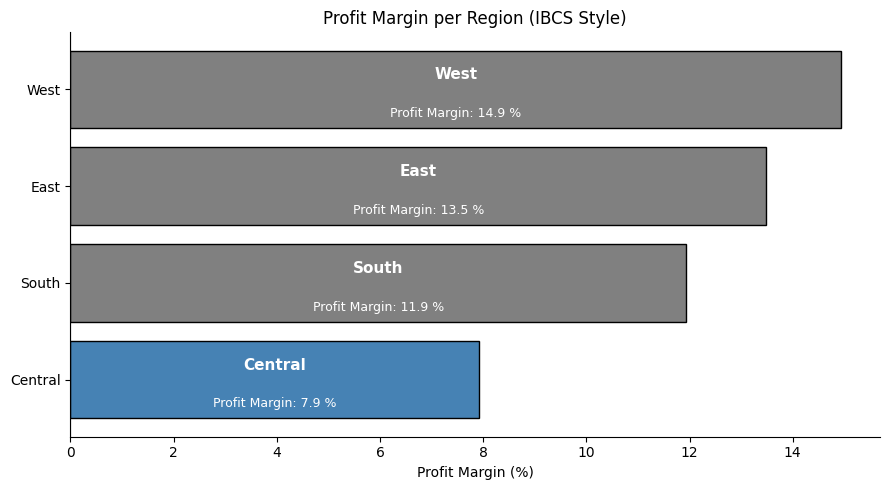

In [ ]:
import matplotlib.pyplot as plt

# Funktion zur Visualisierung mit grösserem Labeltext
def plot_sales_profit_margin_modified(df, group_col):
    # Sortiere absteigend nach Profit Margin (schlechtester zuerst)
    df_sorted = df.sort_values(by='Profit Margin', ascending=True)

    # Färbe alle Balken grau, ausser dem mit dem niedrigsten Profit Margin (blau)
    min_index = df_sorted['Profit Margin'].idxmin()
    colors = ['gray'] * len(df_sorted)
    colors[df_sorted.index.get_loc(min_index)] = 'steelblue'

    # Plot erstellen
    fig, ax = plt.subplots(figsize=(9, 5))
    bars = ax.barh(df_sorted.index, df_sorted['Profit Margin'], color=colors, edgecolor='black')

    # Balkenbeschriftung mit grösserem, fettem Region-Namen
    for bar, label, val in zip(bars, df_sorted.index, df_sorted['Profit Margin']):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 + 0.15,  # etwas nach oben
            f'{label}',
            ha='center', va='center',
            color='white',
            fontsize=11,
            weight='bold'
        )
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 - 0.25,  # etwas nach unten
            f'Profit Margin: {val:.1f} %',
            ha='center', va='center',
            color='white',
            fontsize=9
        )

    # Titel und Stil
    ax.set_title(f'Profit Margin per {group_col} (IBCS Style)')
    ax.set_xlabel('Profit Margin (%)')
    ax.axvline(0, color='black', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Gruppiere nach Region und berechne Profit Margin
agg_region_df = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_region_df['Profit Margin'] = 100 * agg_region_df['Profit'] / agg_region_df['Sales']

# Funktionsaufruf
plot_sales_profit_margin_modified(agg_region_df, 'Region')


###Texas and Illinois are the main contributors to the poor performance of the Central region.

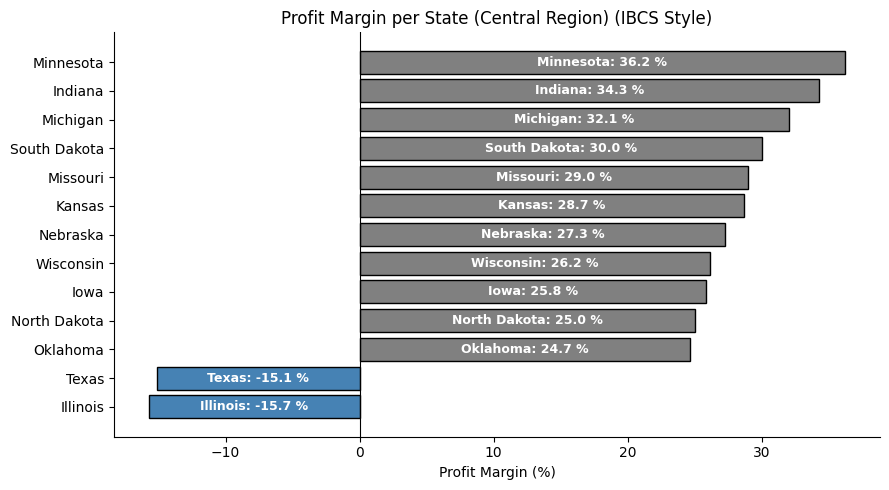

In [ ]:
import matplotlib.pyplot as plt

# Liste der Central States
central_states = [
    'Illinois', 'Texas', 'Oklahoma', 'North Dakota', 'Iowa', 'Wisconsin',
    'Nebraska', 'Kansas', 'Missouri', 'South Dakota', 'Michigan', 'Indiana', 'Minnesota'
]

# Filtere die Daten
central_df = df[df['State'].isin(central_states)]

# Aggregiere Sales und Profit
agg_central_df = central_df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'})
agg_central_df['Profit Margin'] = 100 * agg_central_df['Profit'] / agg_central_df['Sales']
agg_central_df = agg_central_df.sort_values(by='Profit Margin')

# Farben festlegen – Texas und Illinois = blau, Rest = grau
colors = ['steelblue' if state in ['Texas', 'Illinois'] else 'gray' for state in agg_central_df.index]

# Plot
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.barh(agg_central_df.index, agg_central_df['Profit Margin'], color=colors, edgecolor='black')

# Balkenbeschriftung: Name + Profit Margin
for bar, label, val in zip(bars, agg_central_df.index, agg_central_df['Profit Margin']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9,
        weight='bold'
    )

# Achsen und Titel
ax.set_title('Profit Margin per State (Central Region) (IBCS Style)')
ax.set_xlabel('Profit Margin (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


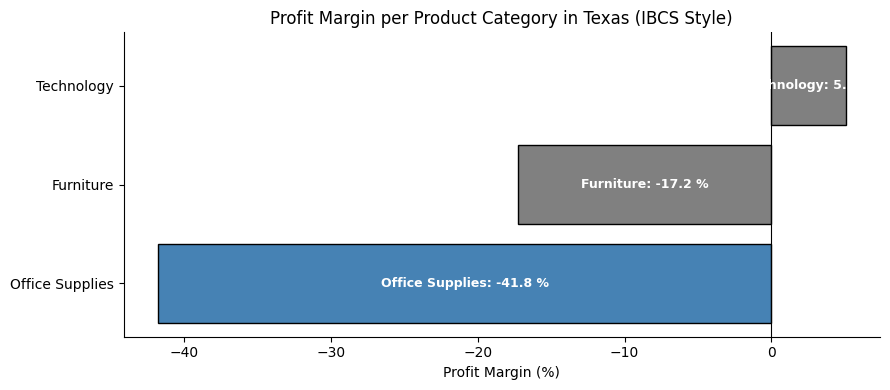

In [ ]:
import matplotlib.pyplot as plt

# Filter: nur Texas
texas_df = df[df['State'] == 'Texas']

# Gruppierung nach Kategorie
agg_texas_cat = texas_df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
agg_texas_cat['Profit Margin'] = 100 * agg_texas_cat['Profit'] / agg_texas_cat['Sales']
agg_texas_cat = agg_texas_cat.sort_values(by='Profit Margin')

# Farben: schlechtester Balken = blau, Rest = grau
min_cat = agg_texas_cat['Profit Margin'].idxmin()
colors = ['steelblue' if cat == min_cat else 'gray' for cat in agg_texas_cat.index]

# Plot
fig, ax = plt.subplots(figsize=(9, 4))
bars = ax.barh(agg_texas_cat.index, agg_texas_cat['Profit Margin'], color=colors, edgecolor='black')

# Labels im Balken: Kategorie + Profit Margin
for bar, label, val in zip(bars, agg_texas_cat.index, agg_texas_cat['Profit Margin']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9,
        weight='bold'
    )

# Achsenformatierung
ax.set_title('Profit Margin per Product Category in Texas (IBCS Style)')
ax.set_xlabel('Profit Margin (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###Texas Office Supplies in Crisis: –41% Profit Margin Compared to +17% National Average

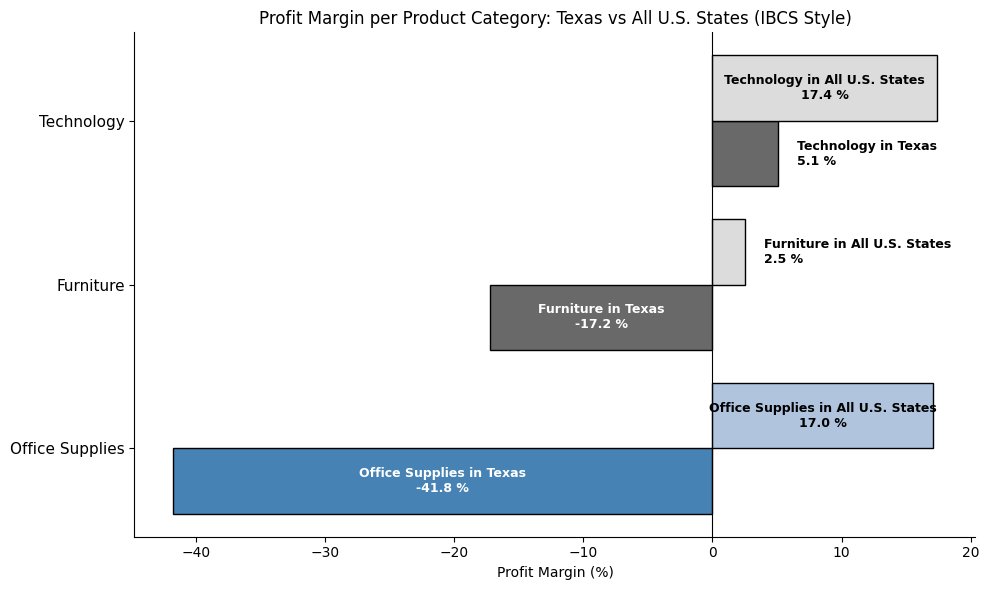

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Kategorie setzen
categories = df['Category'].unique()

# Aggregation Texas & USA
agg_texas = df[df['State'] == 'Texas'].groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
agg_usa = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})

# Profit Margins berechnen
pm_texas = 100 * agg_texas['Profit'] / agg_texas['Sales']
pm_usa = 100 * agg_usa['Profit'] / agg_usa['Sales']

# Zusammenführen
df_comp = pd.DataFrame({
    'Texas': pm_texas,
    'All U.S. States': pm_usa
}).dropna()

# Sortierung nach Texas
df_comp = df_comp.sort_values(by='Texas')
categories_sorted = df_comp.index.tolist()

# Farben definieren
colors_texas = ['steelblue' if cat == 'Office Supplies' else 'dimgray' for cat in df_comp.index]
colors_usa = ['lightsteelblue' if cat == 'Office Supplies' else 'gainsboro' for cat in df_comp.index]

# Positionen für Balken
y = np.arange(len(df_comp))
bar_width = 0.4

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.barh(y - bar_width/2, df_comp['Texas'], height=bar_width, color=colors_texas, edgecolor='black')
bars2 = ax.barh(y + bar_width/2, df_comp['All U.S. States'], height=bar_width, color=colors_usa, edgecolor='black')

# Text in zwei Zeilen (Label + Zahl), Farbe je nach Hintergrund
for bars, values, group_label, color_list in zip(
    [bars1, bars2],
    [df_comp['Texas'], df_comp['All U.S. States']],
    ['in Texas', 'in All U.S. States'],
    [colors_texas, colors_usa]
):
    for bar, val, category, color in zip(bars, values, df_comp.index, color_list):
        label_line = f'{category} {group_label}'
        value_line = f'{val:.1f} %'
        inside = abs(val) > 16

        # Automatische Textfarbe
        if color in ['dimgray', 'steelblue']:
            text_color = 'white'
        else:
            text_color = 'black'

        if inside:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{label_line}\n{value_line}',
                ha='center', va='center',
                color=text_color,
                fontsize=9,
                weight='bold'
            )
        else:
            offset = 1.5
            ha = 'left' if val > 0 else 'right'
            xpos = bar.get_x() + bar.get_width() + offset if val > 0 else bar.get_x() + bar.get_width() - offset
            ax.text(
                xpos,
                bar.get_y() + bar.get_height() / 2,
                f'{label_line}\n{value_line}',
                ha=ha, va='center',
                color='black',
                fontsize=9,
                weight='bold'
            )

# Achsen, Titel, Stil
ax.set_yticks(y)
ax.set_yticklabels(categories_sorted, fontsize=11)
ax.set_xlabel('Profit Margin (%)')
ax.set_title('Profit Margin per Product Category: Texas vs All U.S. States (IBCS Style)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###Texas grants unusually high discounts on Office Supplies. This policy should be reconsidered.

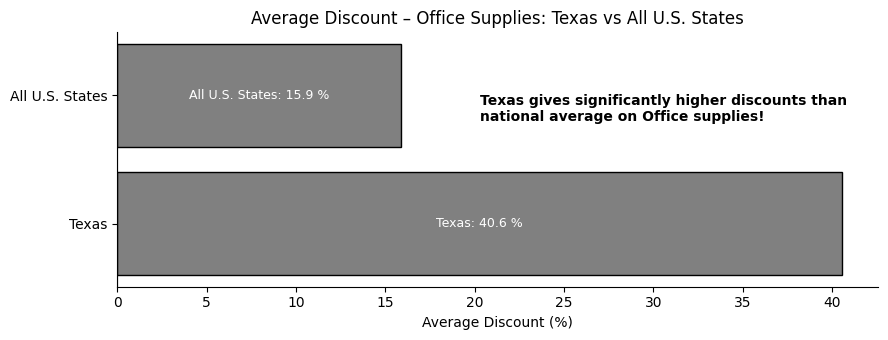

In [ ]:
import matplotlib.pyplot as plt

# Durchschnittlicher Discount berechnen
avg_discount_texas = df[
    (df['State'] == 'Texas') &
    (df['Segment'] == 'Consumer') &
    (df['Category'] == 'Office Supplies')
]['Discount'].mean() * 100

avg_discount_all = df[
    (df['Segment'] == 'Consumer') &
    (df['Category'] == 'Office Supplies')
]['Discount'].mean() * 100

# Daten für Balken
labels = ['Texas', 'All U.S. States']
values = [avg_discount_texas, avg_discount_all]
colors = ['gray', 'gray']

# Plot
fig, ax = plt.subplots(figsize=(9, 3.5))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Balkenbeschriftung
for bar, label, val in zip(bars, labels, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}: {val:.1f} %',
        ha='center', va='center',
        color='white',
        fontsize=9
    )

# Headline nach rechts und weiter nach unten verschoben
ax.text(
    max(values) * 0.5, 0.8,
    'Texas gives significantly higher discounts than\nnational average on Office supplies!',
    color='black',
    fontsize=10,
    weight='bold'
)

# Titel und Achsen
ax.set_title('Average Discount – Office Supplies: Texas vs All U.S. States')
ax.set_xlabel('Average Discount (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###Furniture is by far the worst perfoming Product Category in the Superstore

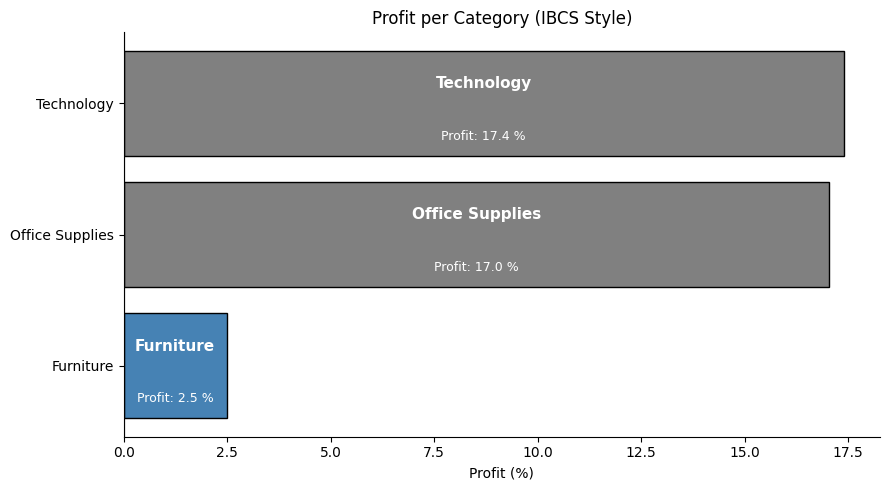

In [ ]:
import matplotlib.pyplot as plt

# Funktion zur Visualisierung (mit "Profit" statt "Profit Margin")
def plot_sales_profit_modified(df, group_col, blue_label):
    # Sortiere aufsteigend nach Profit
    df_sorted = df.sort_values(by='Profit', ascending=True)

    # Farben: blau für das gewünschte Label, sonst grau
    colors = ['steelblue' if label == blue_label else 'gray' for label in df_sorted.index]

    # Plot
    fig, ax = plt.subplots(figsize=(9, 5))
    bars = ax.barh(df_sorted.index, df_sorted['Profit'], color=colors, edgecolor='black')

    # Balkenbeschriftung
    for bar, label, val in zip(bars, df_sorted.index, df_sorted['Profit']):
        color = 'white' if label == blue_label else 'white'
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 + 0.15,
            f'{label}',
            ha='center', va='center',
            color=color,
            fontsize=11,
            weight='bold'
        )
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 - 0.25,
            f'Profit: {val:.1f} %',
            ha='center', va='center',
            color=color,
            fontsize=9
        )

    # Achsen und Stil
    ax.set_title(f'Profit per {group_col} (IBCS Style)')
    ax.set_xlabel('Profit (%)')
    ax.axvline(0, color='black', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

# Aggregation nach Kategorie
agg_category_df = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
agg_category_df['Profit'] = 100 * agg_category_df['Profit'] / agg_category_df['Sales']  # In %

# Aufruf mit 'Furniture' als blauer Balken
plot_sales_profit_modified(agg_category_df, 'Category', blue_label='Furniture')



###Tables are by far performing the worst in the East.

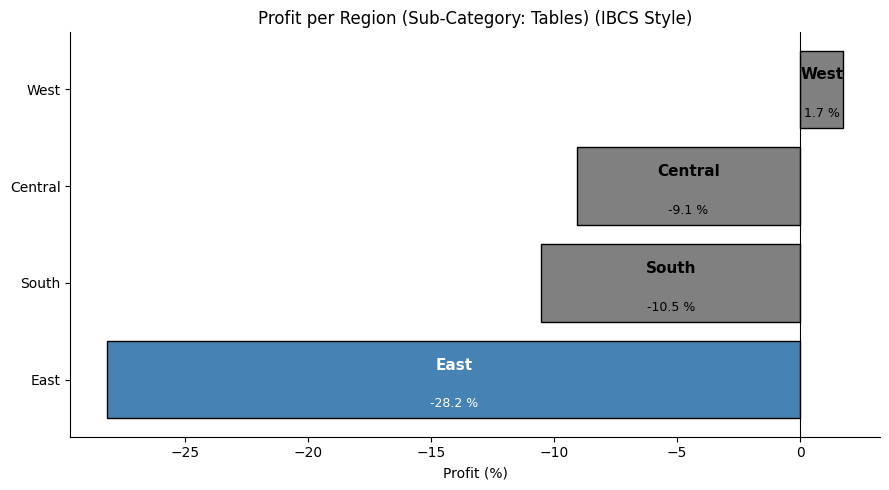

In [ ]:
import matplotlib.pyplot as plt

# Funktion zur Visualisierung – Balken mit minimalem Profit blau
def plot_profit_margin_with_blue_min(df, group_col):
    # Sortieren nach Profit aufsteigend
    df_sorted = df.sort_values(by='Profit', ascending=True)

    # Farben zuweisen: alle grau, der kleinste blau
    colors = ['gray'] * len(df_sorted)
    colors[0] = 'steelblue'  # unterster Balken

    # Plot
    fig, ax = plt.subplots(figsize=(9, 5))
    bars = ax.barh(df_sorted.index, df_sorted['Profit'], color=colors, edgecolor='black')

    # Balkenbeschriftungen
    for bar, label, val in zip(bars, df_sorted.index, df_sorted['Profit']):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 + 0.15,
            f'{label}',
            ha='center', va='center',
            color='white' if colors[df_sorted.index.get_loc(label)] != 'gray' else 'black',
            fontsize=11,
            weight='bold'
        )
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2 - 0.25,
            f'{val:.1f} %',
            ha='center', va='center',
            color='white' if colors[df_sorted.index.get_loc(label)] != 'gray' else 'black',
            fontsize=9
        )

    # Titel, Achsen
    ax.set_title(f'Profit per {group_col} (Sub-Category: Tables) (IBCS Style)')
    ax.set_xlabel('Profit (%)')
    ax.axvline(0, color='black', linewidth=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

df_tables_region = df[df['Sub-Category'] == 'Tables'].groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
df_tables_region['Profit'] = 100 * df_tables_region['Profit'] / df_tables_region['Sales']

plot_profit_margin_with_blue_min(df_tables_region, 'Region')


###The biggest contributors to the poor performance of Tables are Ohio, New York, and Pennsylvania.

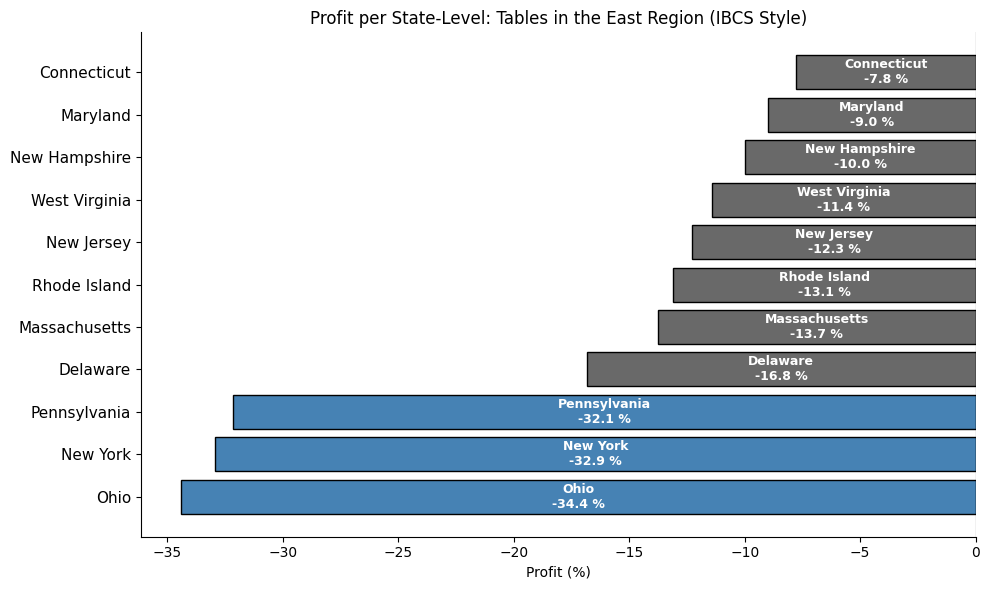

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter: Sub-Category = 'Tables', Region = 'East'
df_filtered = df[(df['Sub-Category'] == 'Tables') & (df['Region'] == 'East')]

# Gruppierung nach Bundesstaat
df_state_tables = df_filtered.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
df_state_tables['Profit Margin'] = 100 * df_state_tables['Profit'] / df_state_tables['Sales']

# Sortieren
df_state_tables = df_state_tables.sort_values(by='Profit Margin', ascending=True)

# Schlechteste 3 Staaten bestimmen
bottom_states = df_state_tables.head(3).index.tolist()

# Farben definieren
colors = ['steelblue' if state in bottom_states else 'dimgray' for state in df_state_tables.index]

# Positionen für Balken
y = np.arange(len(df_state_tables))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(y, df_state_tables['Profit Margin'], color=colors, edgecolor='black')

# Beschriftungen immer im Balken, in zwei Zeilen
for bar, state, val, color in zip(bars, df_state_tables.index, df_state_tables['Profit Margin'], colors):
    label = f'{state}'
    value = f'{val:.1f} %'
    text_color = 'white' if color in ['steelblue', 'dimgray'] else 'black'

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{label}\n{value}',
        ha='center', va='center',
        color=text_color,
        fontsize=9,
        weight='bold'
    )

# Achsen und Titel
ax.set_yticks(y)
ax.set_yticklabels(df_state_tables.index, fontsize=11)
ax.set_xlabel('Profit (%)')
ax.set_title('Profit per State-Level: Tables in the East Region (IBCS Style)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###One of the Reasons for poor performance are probably high discounts

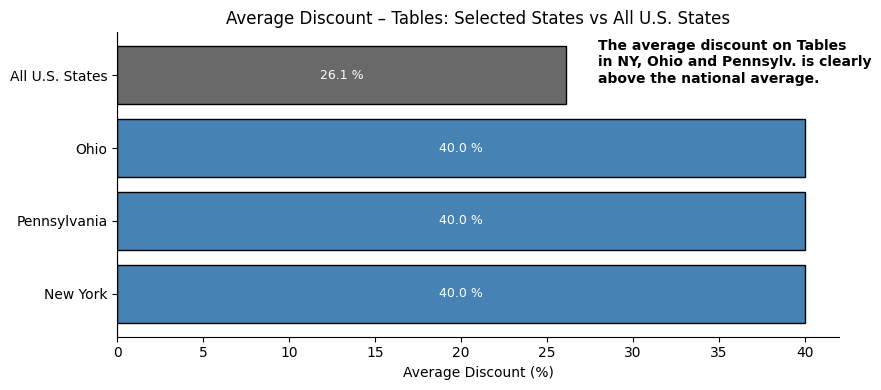

In [ ]:
import matplotlib.pyplot as plt

# Target Sub-Category for the analysis
subcategory = 'Tables'

# Focused states within the East region
states = ['New York', 'Pennsylvania', 'Ohio']

# Calculate average discount per state for the selected sub-category
state_discounts = [
    df[(df['State'] == state) & (df['Sub-Category'] == subcategory)]['Discount'].mean() * 100
    for state in states
]

# Calculate national average discount for the sub-category
avg_discount_all = df[df['Sub-Category'] == subcategory]['Discount'].mean() * 100

# Prepare data for plotting
labels = states + ['All U.S. States']
values = state_discounts + [avg_discount_all]
colors = ['steelblue'] * len(states) + ['dimgray']  # Blue for states, gray for US

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(9, 4))
bars = ax.barh(labels, values, color=colors, edgecolor='black')

# Add value labels inside the bars
for bar, val, color in zip(bars, values, colors):
    text_color = 'white' if color in ['steelblue', 'dimgray'] else 'black'
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{val:.1f} %',
        ha='center', va='center',
        color=text_color,
        fontsize=9
    )

# Add insight annotation (adjust text as needed based on results)
ax.text(
    max(values) * 0.7, 2.9,
    'The average discount on Tables\nin NY, Ohio and Pennsylv. is clearly\nabove the national average.',
    color='black',
    fontsize=10,
    weight='bold'
)

# Chart title and axis formatting
ax.set_title('Average Discount – Tables: Selected States vs All U.S. States')
ax.set_xlabel('Average Discount (%)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###How much could we save by cancelling Office Supplies in Texas, all of Texas, or the entire Central Region?

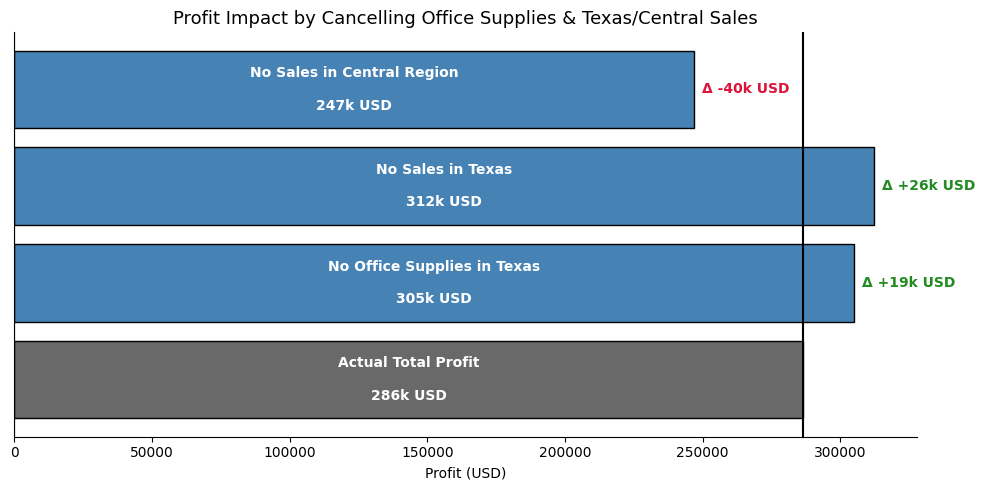

In [ ]:
import matplotlib.pyplot as plt

# Sub-category of interest
subcategory = 'Office Supplies'

# 1. Profit from Office Supplies in Texas
profit_office_tx = df[
    (df['Category'] == subcategory) & (df['State'] == 'Texas')
]['Profit'].sum()

# 2. Profit from all categories in Texas
profit_all_tx = df[df['State'] == 'Texas']['Profit'].sum()

# 3. Profit from all categories in Central region
profit_central = df[df['Region'] == 'Central']['Profit'].sum()

# 4. Total Superstore profit
total_profit = df['Profit'].sum()

# Adjusted profits
adjusted_office_tx = total_profit - profit_office_tx
adjusted_all_tx = total_profit - profit_all_tx
adjusted_central = total_profit - profit_central

# Data for plotting
labels = [
    'Actual Total Profit',
    'No Office Supplies in Texas',
    'No Sales in Texas',
    'No Sales in Central Region'
]
values = [total_profit, adjusted_office_tx, adjusted_all_tx, adjusted_central]
colors = ['dimgray'] + ['steelblue'] * 3

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(range(len(values)), values, color=colors, edgecolor='black')

# Add labels inside bars
for bar, label, val in zip(bars, labels, values):
    label_text = label.replace("\n", " ")
    text = f'{label_text}\n\n{round(val / 1000):,.0f}k USD'
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        text,
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        weight='bold'
    )

'''# Draw green delta values outside bars
for i in range(1, len(values)):
    bar = bars[i]
    delta = values[i] - values[0]
    x = bar.get_x() + bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        x + total_profit * 0.01,
        y,
        f'Δ +{round(delta / 1000):,.0f}k USD',
        ha='left',
        va='center',
        fontsize=10,
        color='forestgreen',
        weight='bold'
    )'''
# Draw green delta values outside bars
for i in range(1, len(values)):
    bar = bars[i]
    delta = values[i] - values[0]
    x = bar.get_x() + bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    sign = '+' if delta > 0 else ''  # Only show '+' if positive
    ax.text(
        x + total_profit * 0.01,
        y,
        f'Δ {sign}{round(delta / 1000):,.0f}k USD',
        ha='left',
        va='center',
        fontsize=10,
        color='forestgreen' if delta >= 0 else 'crimson',
        weight='bold'
    )

# Vertical reference line
ax.axvline(total_profit, color='black', linewidth=1.5)

# Formatting
ax.set_yticks([])  # Remove y-axis labels
ax.set_title('Profit Impact by Cancelling Office Supplies & Texas/Central Sales', fontsize=13)
ax.set_xlabel('Profit (USD)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


###How much could we save by cancelling Table sales in the worst-performing states, in the East Region, or entirely?

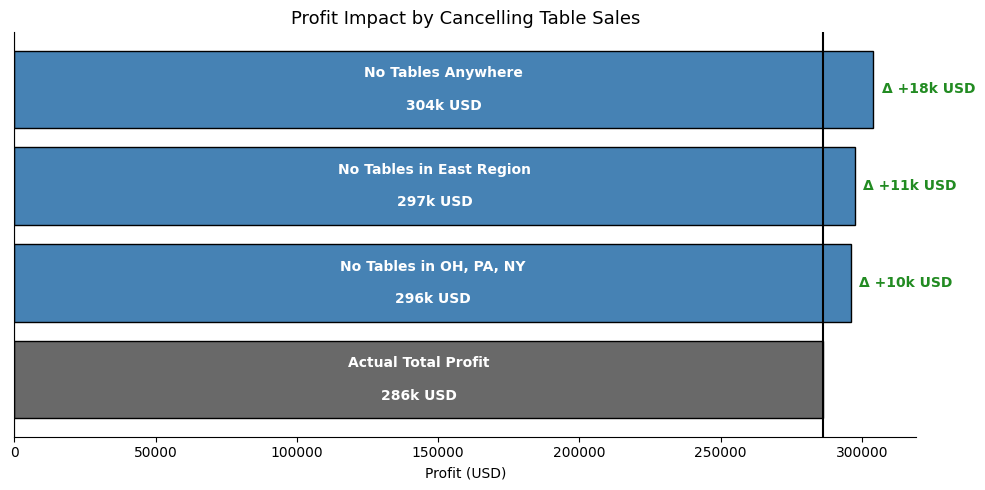

In [ ]:
#Correct visualisation for hypotetical profit
import matplotlib.pyplot as plt

# Sub-Category of interest
subcategory = 'Tables'

# 1. Profit from Tables in OH, PA, NY
states_of_interest = ['Ohio', 'Pennsylvania', 'New York']
profit_tables_3states = df[
    (df['Sub-Category'] == subcategory) &
    (df['State'].isin(states_of_interest))
]['Profit'].sum()

# 2. Profit from Tables in East Region
profit_tables_east = df[
    (df['Sub-Category'] == subcategory) &
    (df['Region'] == 'East')
]['Profit'].sum()

# 3. Total Profit from Tables
profit_tables_total = df[df['Sub-Category'] == subcategory]['Profit'].sum()

# 4. Total Profit of Superstore
total_profit = df['Profit'].sum()

# Calculate adjusted profits
adjusted_3states = total_profit - profit_tables_3states
adjusted_east = total_profit - profit_tables_east
adjusted_all = total_profit - profit_tables_total

# Create bar plot
labels = ['Actual Total Profit', 'No Tables in OH, PA, NY', 'No Tables in East Region', 'No Tables Anywhere']
values = [total_profit, adjusted_3states, adjusted_east, adjusted_all]
colors = ['dimgray'] + ['steelblue'] * 3

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(range(len(values)), values, color=colors, edgecolor='black')

# Add profit labels and descriptions inside the bars
for i, (bar, label, val) in enumerate(zip(bars, labels, values)):
    label_text = label.replace("\n", " ")
    text = f'{label_text}\n\n{round(val / 1000):,.0f}k USD'
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + bar.get_height() / 2,
        text,
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        weight='bold'
    )

# Draw green deltas outside the bars
for i in range(1, len(values)):
    bar = bars[i]
    delta = values[i] - values[0]
    x = bar.get_x() + bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        x + total_profit * 0.01,
        y,
        f'Δ +{round(delta / 1000):,.0f}k USD',
        ha='left',
        va='center',
        fontsize=10,
        color='forestgreen',
        weight='bold'
    )

# Draw vertical reference line at actual total profit
ax.axvline(total_profit, color='black', linewidth=1.5)

# Final formatting
ax.set_yticks([])  # Remove y-axis labels
ax.set_title('Profit Impact by Cancelling Table Sales', fontsize=13)
ax.set_xlabel('Profit (USD)')
ax.axvline(0, color='black', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
